#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [74]:
import pandas as pd
import numpy as np 
import traceback as tb
import re
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
from PIL import Image

| **Variable   Name**| **Description**| **Type**   |
|--------------------|----------------|------------|
| SeriousDlqin2yrs   | Persona experimentó retraso de 90 días o más en el pago o peor en los últimos 2 años.                                                                                                   | *binario*      |
| RevolvingUtilizationOfUnsecuredLines | Saldo total en tarjetas de crédito y líneas de crédito personales excepto bienes raíces y sin deuda de préstamos como préstamos de automóviles dividido por la suma de límites de crédito | percentage |
| age                                  | Edada del prestatario en años                                                                                                                                   | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Número de veces que el prestatario ha estado de 30 a 59 días de atraso pero no peor en los últimos 2 años.                                                                    | integer    |
| DebtRatio                            | Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por ingreso bruto mensual                                                                                 | percentage |
| MonthlyIncome                        | Ingreso mensual                                                                                                                                               | real       |
| NumberOfOpenCreditLinesAndLoans      | Número de préstamos abiertos (como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito)                                                     | integer    |
| NumberOfTimes90DaysLate              | Número de veces que el prestatario ha estado 90 días o más de retraso.                                                                                                | integer    |
| NumberRealEstateLoansOrLines         | Número de hipotecas y préstamos inmobiliarios, incluidas líneas de crédito con garantía hipotecaria.                                                                             | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Número de veces que el prestatario ha estado de 60 a 89 días de atraso pero no peor en los últimos 2 años.                                                                    | integer    |
| NumberOfDependents                   | Número de dependientes en la familia excluyéndose a sí mismos (cónyuge, hijos, etc.)                                                                                | integer    |

The **SeriousDlqin2yrs** is the dependent variable of the dataset, or better named the **label**. This is a boolean value which details if a certain individual has experienced a deliquency of 90 days past due or worse in the last 2 years.

## Data

In [75]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")

## Data exploration

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [119]:
train[train.duplicated()]

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_n


In [77]:
def cardinalidad(data):
        '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
        try:
            df_cardin = pd.DataFrame([{
                        'variable' : i,
                        'tipo_dato' : data[i].dtypes,
                        'cantidad_de_nulos' : data[i].isna().sum(),
                        'valores_unicos' : data[i].unique(),
                        'cardinalidad' : data[i].nunique(),
                        'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
                    } for i in data])
            
        except Exception as a:
            traceback.print_exc()
            print(f"No se pudo procesar el DataFrame por  {a}")

        return df_cardin

In [78]:
cardinalidad(train)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,Id,int64,0,"[44164, 95356, 108917, 99039, 116168, 80810, 9...",73363,100.000000
1,target,int64,0,"[0, 1]",2,0.002726
2,RevolvingUtilizationOfUnsecuredLines,float64,0,"[0.7682191279999999, 0.289873145, 0.0, 0.04606...",62269,84.877936
3,age,object,0,"[68y, 52y, 54y, 66y, 45y, 73y, 63y, 56y, 44y, ...",84,0.114499
4,NumberOfTime30-59DaysPastDueNotWorse,int64,0,"[1, 0, 3, 6, 2, 98, 4, 7, 5, 8, 96, 9, 13, 10,...",15,0.020446
5,DebtRatio,float64,0,"[0.6879302429999999, 0.385497201, 0.34650278, ...",59279,80.802312
6,MonthlyIncome,float64,14567,"[2178.0, 3750.0, 6833.0, 5200.0, nan, 3000.0, ...",10564,14.399629
7,NumberOfOpenCreditLinesAndLoans,int64,0,"[12, 16, 8, 6, 10, 4, 7, 9, 2, 11, 13, 18, 22,...",56,0.076333
8,NumberOfTimes90DaysLate,int64,0,"[0, 2, 1, 4, 3, 98, 7, 5, 6, 11, 10, 9, 17, 96...",17,0.023172
9,NumberRealEstateLoansOrLines,int64,0,"[1, 3, 0, 2, 10, 5, 4, 7, 6, 12, 13, 8, 9, 11,...",24,0.032714


## Data processing

In [79]:
for i in train.columns:
    print(i)
    print(train[i].describe())
    print('-'*10)

Id
count     73363.000000
mean      75035.459564
std       43303.736606
min           2.000000
25%       37449.000000
50%       75032.000000
75%      112628.500000
max      149998.000000
Name: Id, dtype: float64
----------
target
count    73363.000000
mean         0.065919
std          0.248142
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64
----------
RevolvingUtilizationOfUnsecuredLines
count    73363.000000
mean         5.884904
std        235.508449
min          0.000000
25%          0.029752
50%          0.154688
75%          0.558686
max      29110.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
----------
age
count     73363
unique       84
top         48y
freq       1885
Name: age, dtype: object
----------
NumberOfTime30-59DaysPastDueNotWorse
count    73363.000000
mean         0.410507
std          4.090014
min          0.000000
25%          0.000000
50%          0.00000

#### Tratamos la columnas Age

In [80]:

def extraer_numero(x):
    '''Funcion para extraer el valor numérico eliminando los subfijos del valor'''
    try:
        match = re.search(r'(\d+)', x)
        if match:
            numero = int(match.group())
        return numero
    except Exception:
        tb.print_exc()

def columna_age(data):
    '''Función para tratar la columna age dejando el valor solo como número'''
    try:
        data['age_n'] = data['age'].apply(extraer_numero)
        return data
    except Exception:
        tb.print_exc()

In [81]:
train = columna_age(train)
train.drop(columns='age', axis=1, inplace=True)

#### Vemos si tenemos outliers en las columnas numéricas

In [82]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    media_color = 'r'
    mediana_color = 'b'
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, bins = 50)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: RevolvingUtilizationOfUnsecuredLines



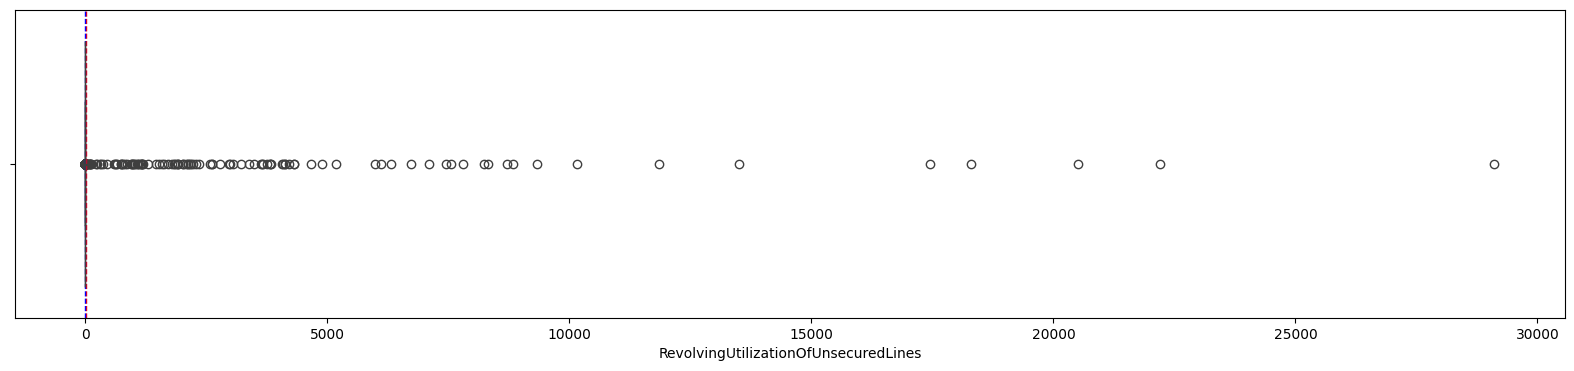

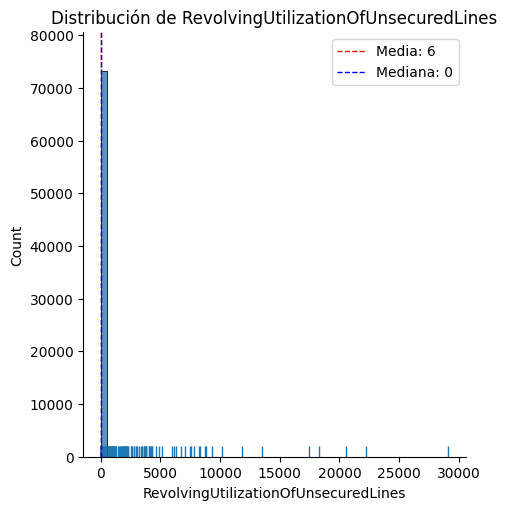

count    73363.0
mean         6.0
std        236.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max      29110.0
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime30-59DaysPastDueNotWorse



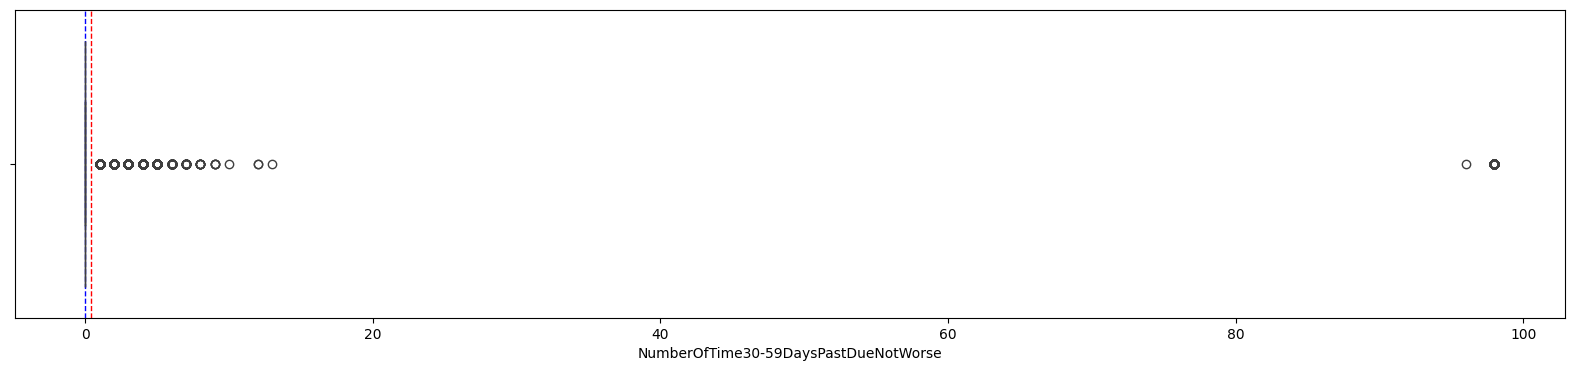

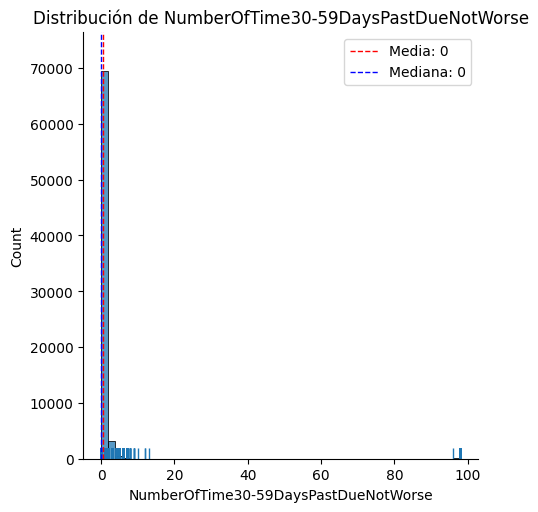

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: DebtRatio



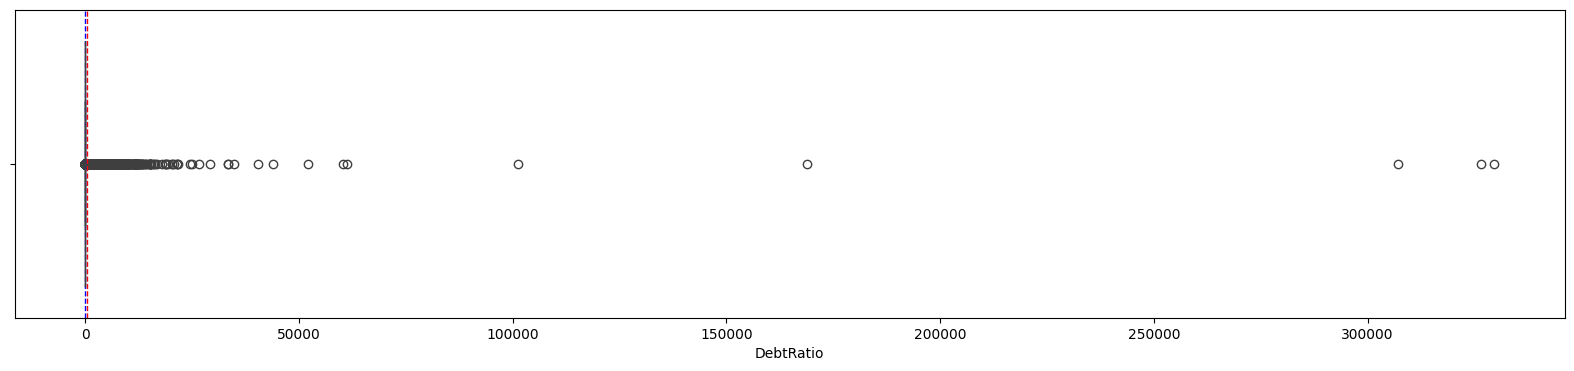

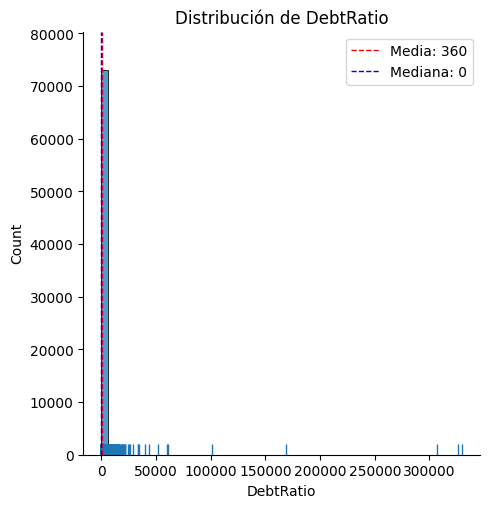

count     73363.0
mean        360.0
std        2478.0
min           0.0
25%           0.0
50%           0.0
75%           1.0
max      329664.0
Name: DebtRatio, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: MonthlyIncome



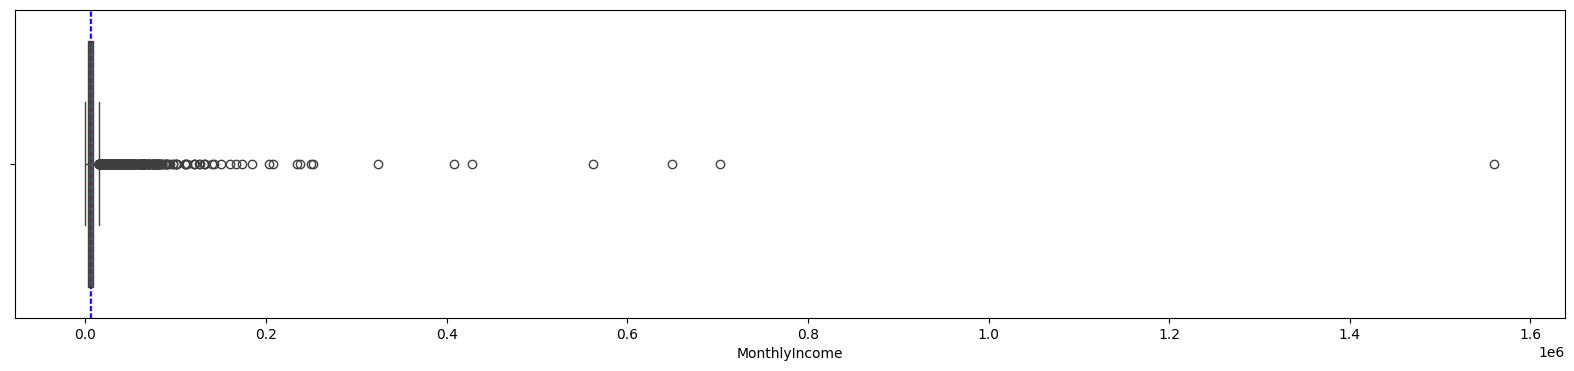

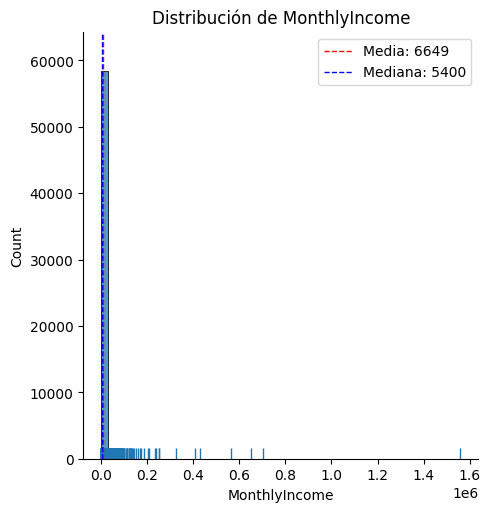

count      58796.0
mean        6649.0
std        10462.0
min            0.0
25%         3400.0
50%         5400.0
75%         8300.0
max      1560100.0
Name: MonthlyIncome, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfOpenCreditLinesAndLoans



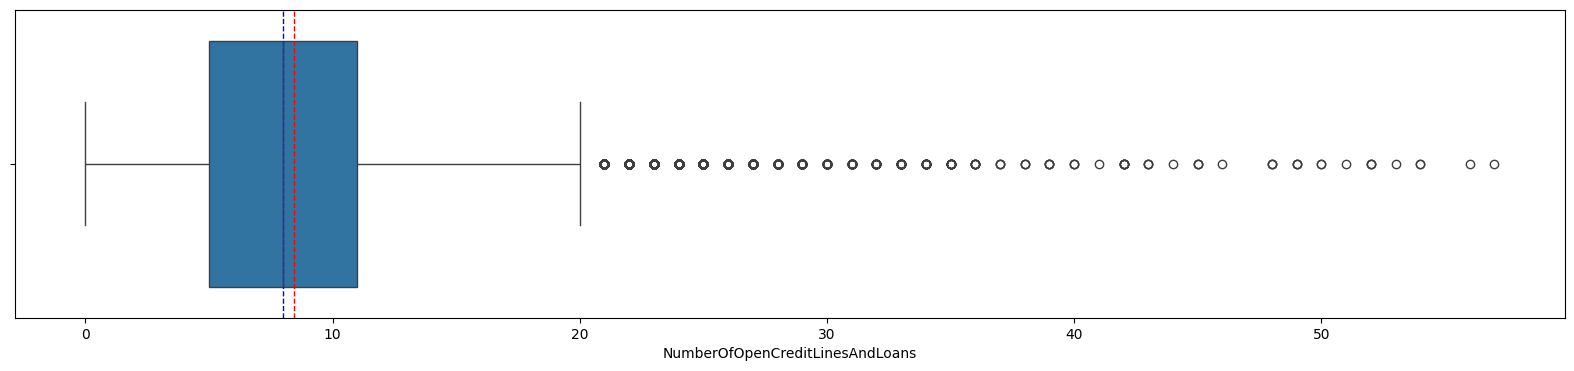

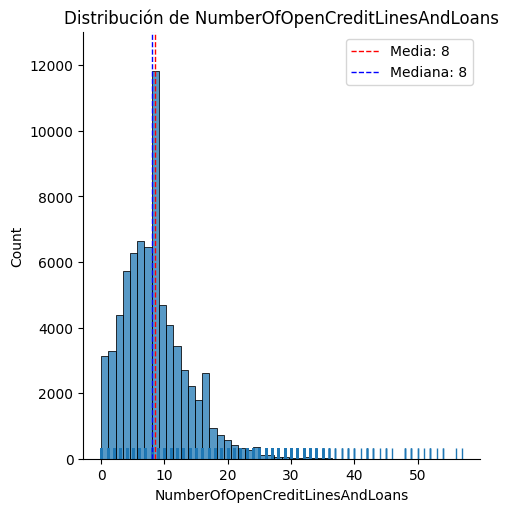

count    73363.0
mean         8.0
std          5.0
min          0.0
25%          5.0
50%          8.0
75%         11.0
max         57.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTimes90DaysLate



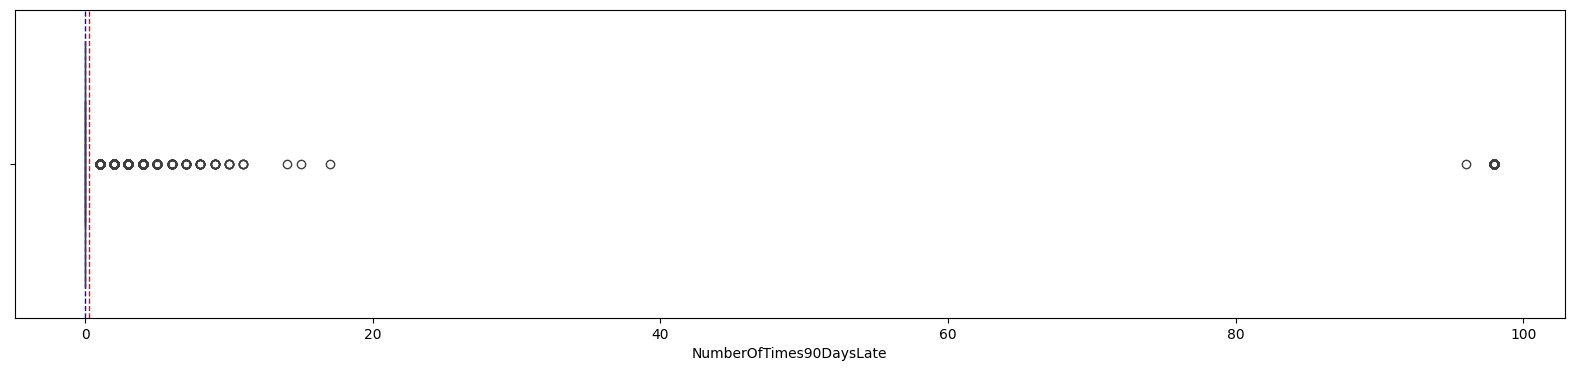

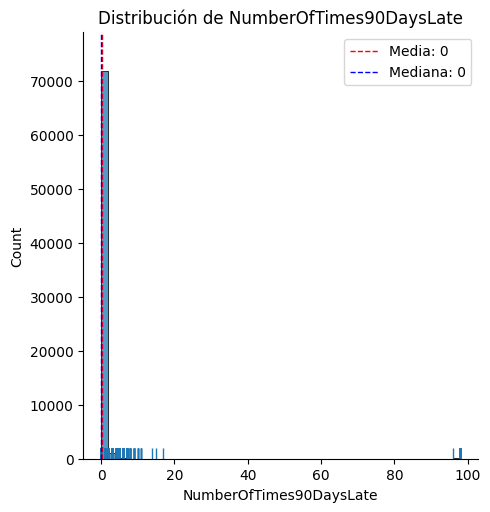

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTimes90DaysLate, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberRealEstateLoansOrLines



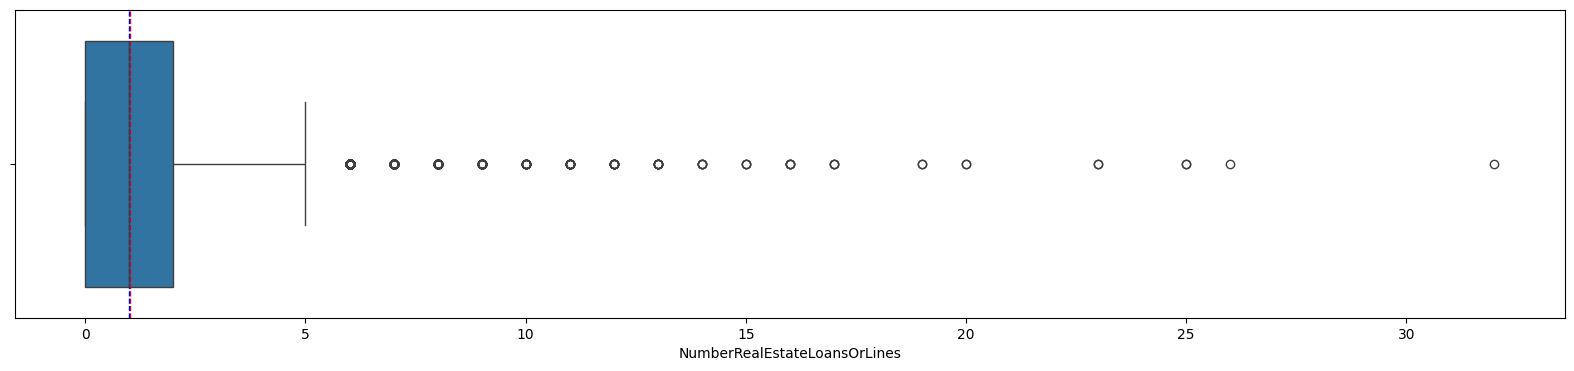

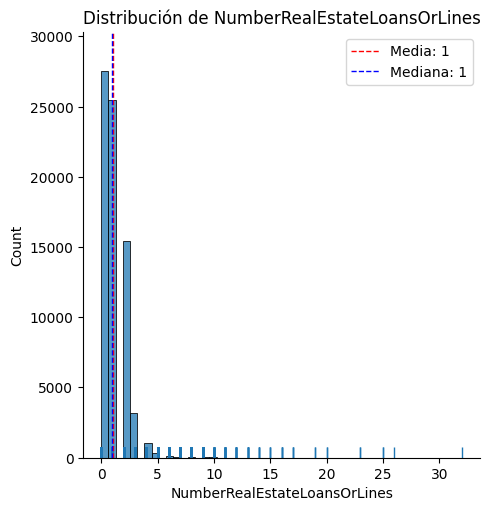

count    73363.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          1.0
75%          2.0
max         32.0
Name: NumberRealEstateLoansOrLines, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime60-89DaysPastDueNotWorse



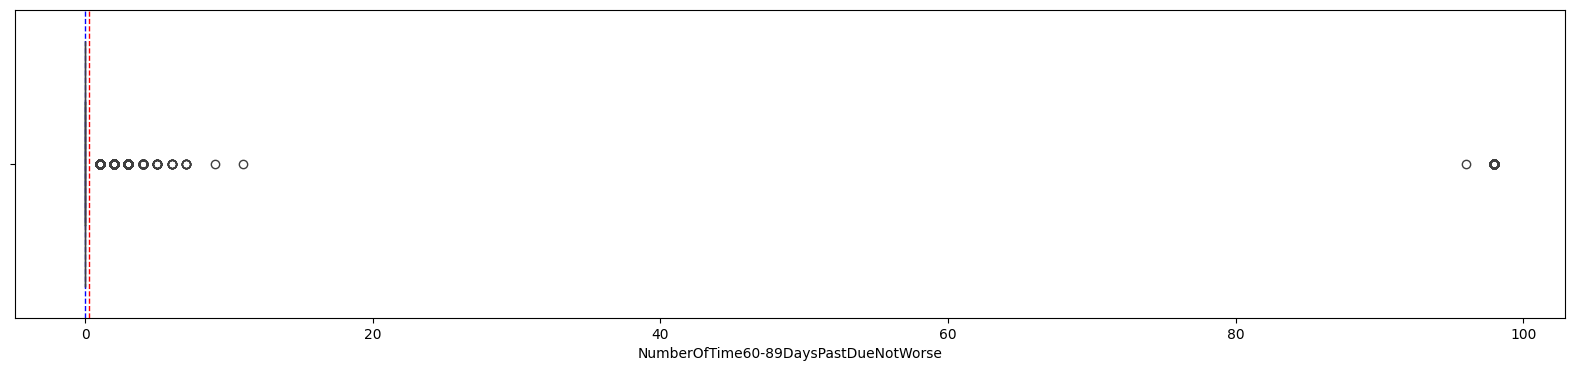

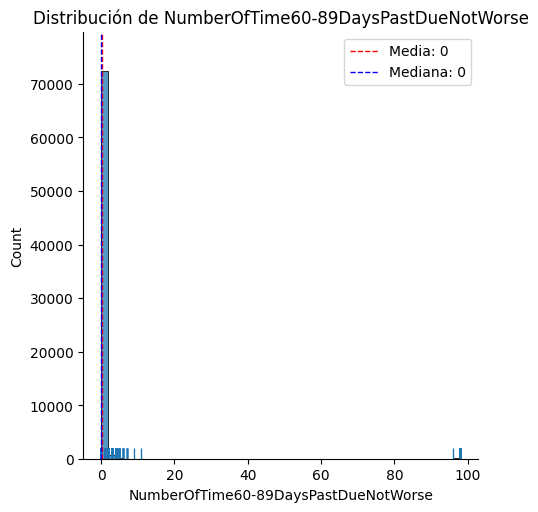

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfDependents



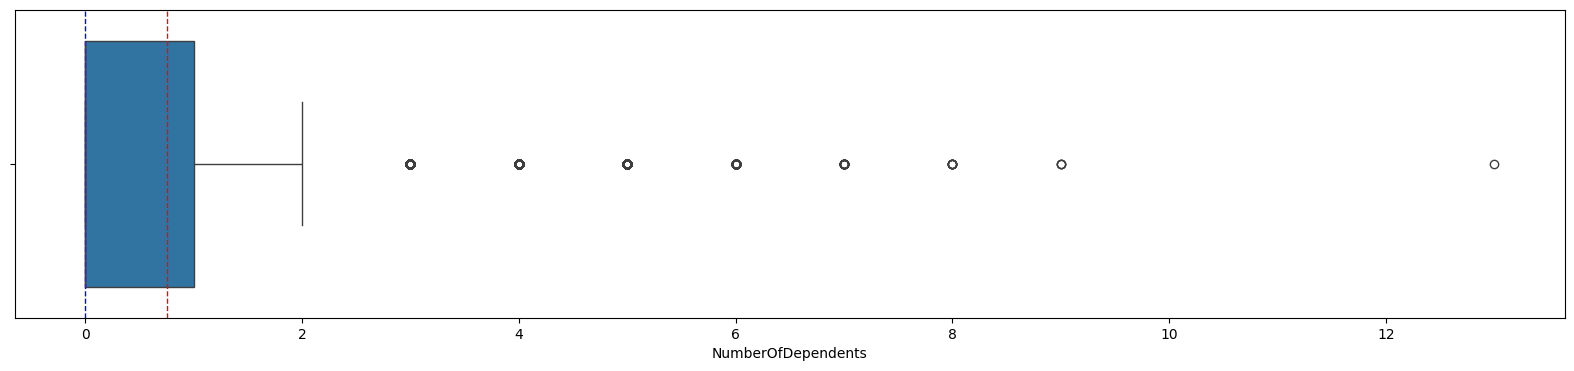

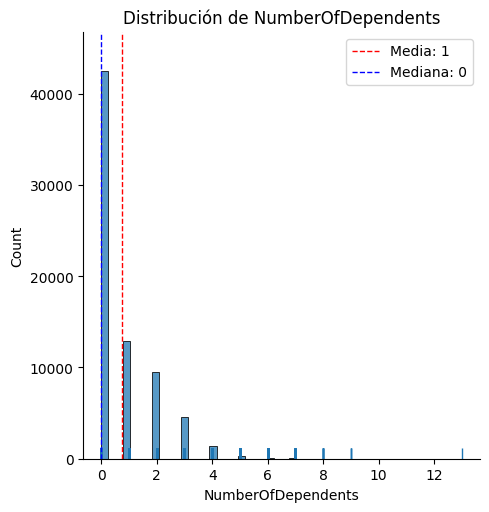

count    71421.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max         13.0
Name: NumberOfDependents, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: age_n



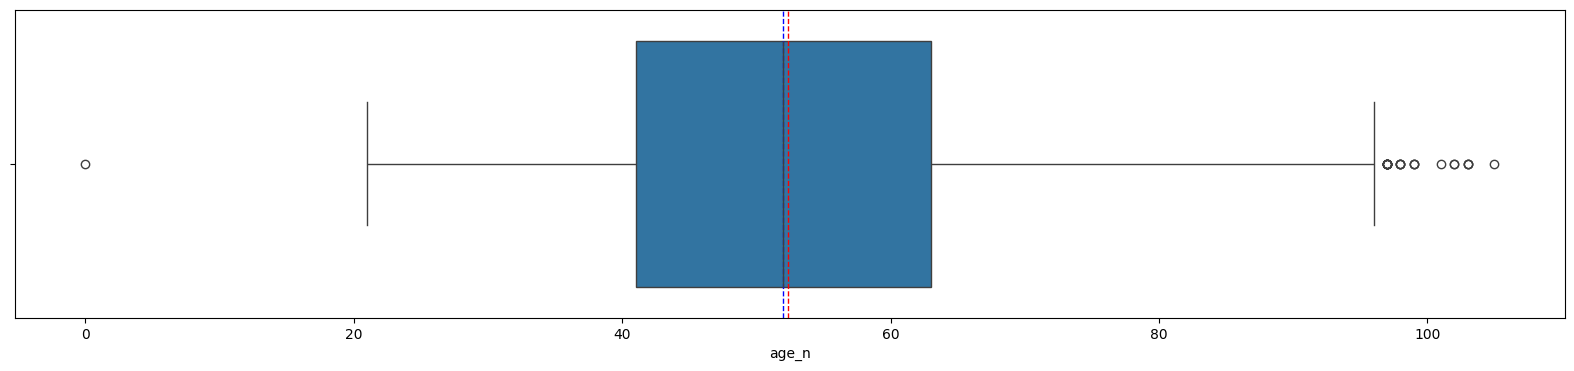

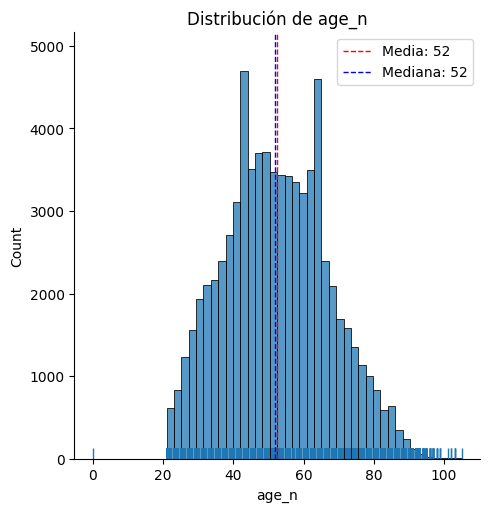

count    73363.0
mean        52.0
std         15.0
min          0.0
25%         41.0
50%         52.0
75%         63.0
max        105.0
Name: age_n, dtype: float64
------------------------------------------------------------


In [83]:
graficos_variables_cuant(train.drop(columns=['Id', 'target'], axis = 1))

In [84]:
train['age_n'].unique()

array([ 68,  52,  54,  66,  45,  73,  63,  56,  44,  70,  48,  40,  39,
        59,  29,  50,  49,  71,  53,  43,  51,  57,  65,  60,  47,  74,
        46,  30,  32,  22,  37,  25,  28,  42,  75,  77,  55,  36,  72,
        79,  61,  76,  82,  67,  83,  88,  80,  78,  38,  26,  64,  81,
        33,  34,  58,  69,  41,  62,  27,  86,  24,  35,  90,  84,  23,
        91,  31,  89,  93,  99,  85,  87,  21,  94,  96,  98,  92, 105,
       103, 102,  97,  95,   0, 101], dtype=int64)

In [85]:
train[train['age_n'] > 90]['age_n'].unique()

array([ 91,  93,  99,  94,  96,  98,  92, 105, 103, 102,  97,  95, 101],
      dtype=int64)

In [86]:
train.groupby(by='age_n').mean()[['MonthlyIncome']]

,MonthlyIncome
age_n,
0,6000.000000
21,1193.343284
22,1334.768293
23,1594.371429
24,1965.863787
...,...
99,6500.000000
101,NaN
102,3358.500000


In [87]:
train[train['MonthlyIncome'] == 6000].groupby('MonthlyIncome').median()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_n
MonthlyIncome,,,,,,,,,,,
6000.0,72563.0,0.0,0.160061,0.0,0.318614,8.0,0.0,1.0,0.0,0.0,49.0


In [88]:
train['age_n'].replace(0, 49, inplace=True)

In [89]:
train.groupby(by='age_n').mean()[['MonthlyIncome']]

,MonthlyIncome
age_n,
21,1193.343284
22,1334.768293
23,1594.371429
24,1965.863787
25,2456.679144
...,...
99,6500.000000
101,NaN
102,3358.500000


<Axes: >

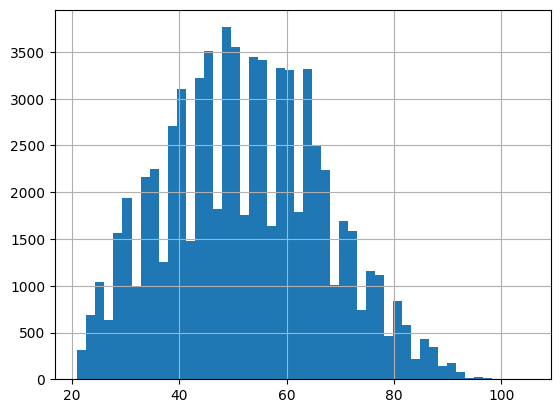

In [90]:
train['age_n'].hist(bins=50)

In [91]:
train[(train['age_n'] > 95) & (train['MonthlyIncome'].isna()) & (train['NumberOfDependents'].isna())]

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_n
578,24007,0,0.000843,0,0.0,NaN,4,0,0,0,NaN,99
6663,56761,0,0.003469,0,2.0,NaN,4,0,0,0,NaN,105
22404,123939,0,0.008684,0,9.0,NaN,4,0,0,0,NaN,96
25713,28870,0,1.000000,0,0.0,NaN,1,0,0,0,NaN,97
39297,41127,0,0.008600,0,5.0,NaN,3,0,0,0,NaN,97
52019,2922,0,0.005043,0,800.0,NaN,5,0,0,0,NaN,99
53402,125516,0,1.000000,0,0.0,NaN,1,0,0,0,NaN,96


In [92]:
dicc = train.groupby(by='age_n').mean()[['MonthlyIncome']].dropna().to_dict()['MonthlyIncome']

In [93]:
dicc

{21: 1193.3432835820895,
 22: 1334.7682926829268,
 23: 1594.3714285714286,
 24: 1965.8637873754153,
 25: 2456.6791443850266,
 26: 3017.6930894308944,
 27: 3206.203773584906,
 28: 3669.6095380029806,
 29: 3796.9021582733812,
 30: 4357.319512195122,
 31: 4709.133569739953,
 32: 4674.152272727273,
 33: 5312.848297213623,
 34: 5415.618101545254,
 35: 5975.133684210527,
 36: 5768.33502538071,
 37: 6067.88306828812,
 38: 5993.411710887466,
 39: 6407.531676022454,
 40: 6530.099550898203,
 41: 6745.594170403588,
 42: 6955.815251572327,
 43: 7362.525780682643,
 44: 8708.107692307693,
 45: 7024.924619640387,
 46: 7108.027631578947,
 47: 7385.079375406636,
 48: 7334.054088860271,
 49: 7896.982878883957,
 50: 7914.722222222223,
 51: 7796.252427184466,
 52: 7645.492783505155,
 53: 7712.133858267716,
 54: 7950.99070100143,
 55: 7642.460458240946,
 56: 7384.14686825054,
 57: 7679.229102167183,
 58: 7469.547976011994,
 59: 7665.639646869984,
 60: 7674.404466501241,
 61: 7510.115384615385,
 62: 7477.39

In [94]:
train['MonthlyIncome'].fillna(train['age_n'].map(dicc), inplace=True)

In [95]:
dicc_1 = train.groupby(by='age_n').median()[['NumberOfDependents']].dropna().to_dict()['NumberOfDependents']

In [96]:
dicc_1

{21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 1.0,
 40: 1.0,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 44: 1.0,
 45: 1.0,
 46: 1.0,
 47: 1.0,
 48: 1.0,
 49: 1.0,
 50: 1.0,
 51: 1.0,
 52: 1.0,
 53: 1.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 0.0,
 95: 0.0,
 96: 0.0,
 97: 0.0,
 98: 0.0,
 99: 0.0,
 101: 0.0,
 102: 0.5,
 103: 0.0}

In [97]:
train['NumberOfDependents'].fillna(train['age_n'].map(dicc_1), inplace=True)

In [98]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

In [99]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 4   DebtRatio                             73363 non-null  float64
 5   MonthlyIncome                         73363 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 7   NumberOfTimes90DaysLate               73363 non-null  int64  
 8   NumberRealEstateLoansOrLines          73363 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 10  NumberOfDependents                    73363 non-null  float64
 11  age_n          

------------------------------------------------------------
VARIABLE: Id



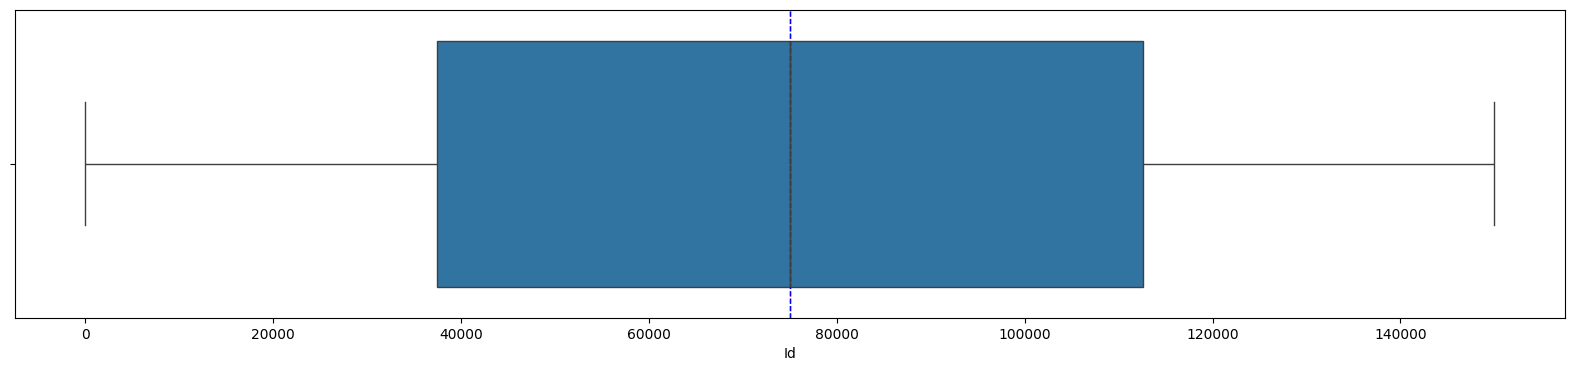

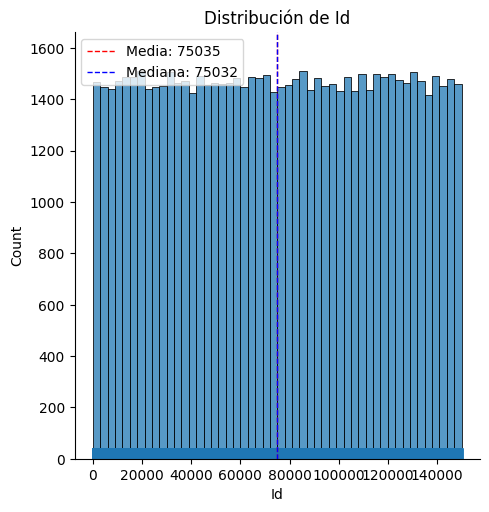

count     73363.0
mean      75035.0
std       43304.0
min           2.0
25%       37449.0
50%       75032.0
75%      112628.0
max      149998.0
Name: Id, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: target



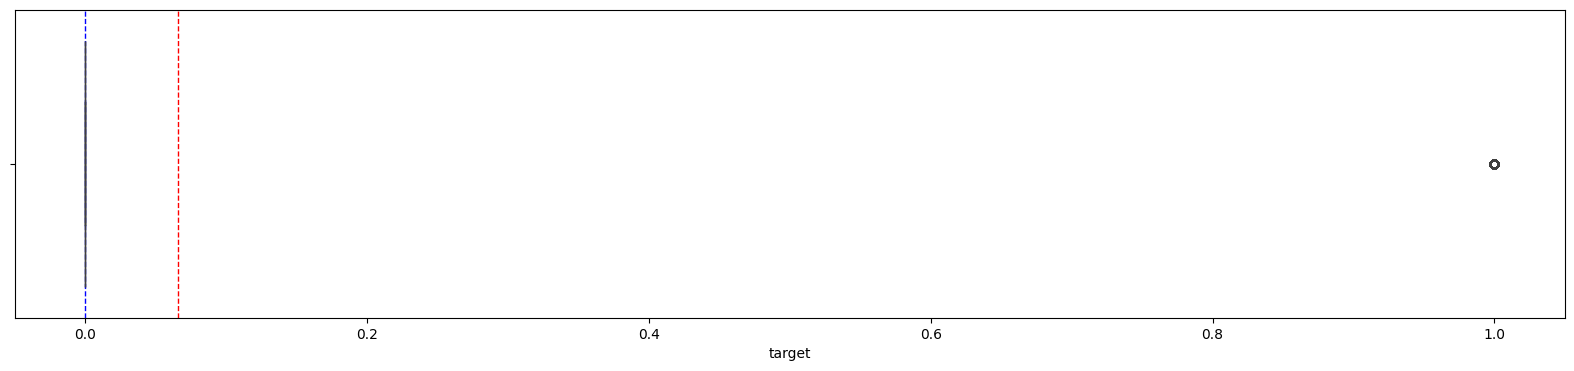

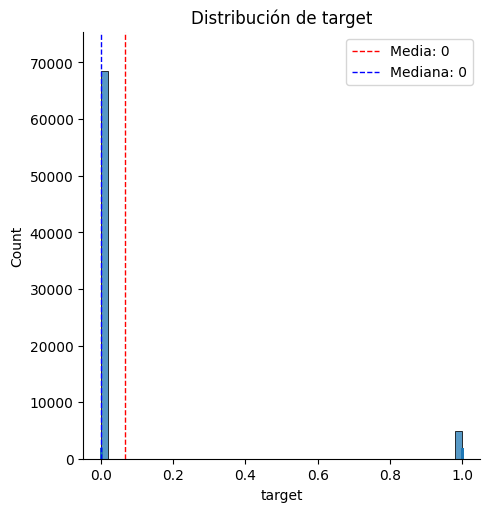

count    73363.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: target, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: RevolvingUtilizationOfUnsecuredLines



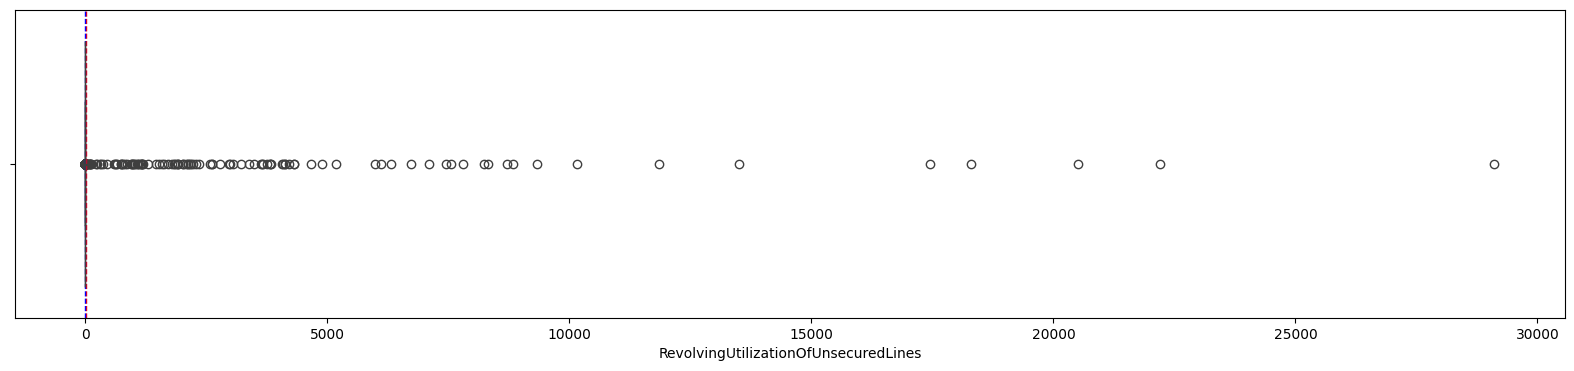

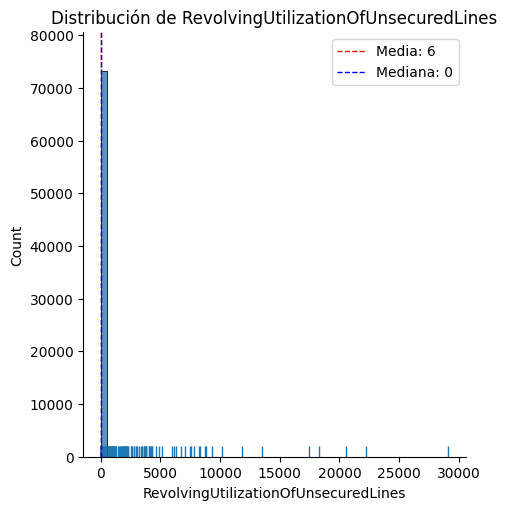

count    73363.0
mean         6.0
std        236.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max      29110.0
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime30-59DaysPastDueNotWorse



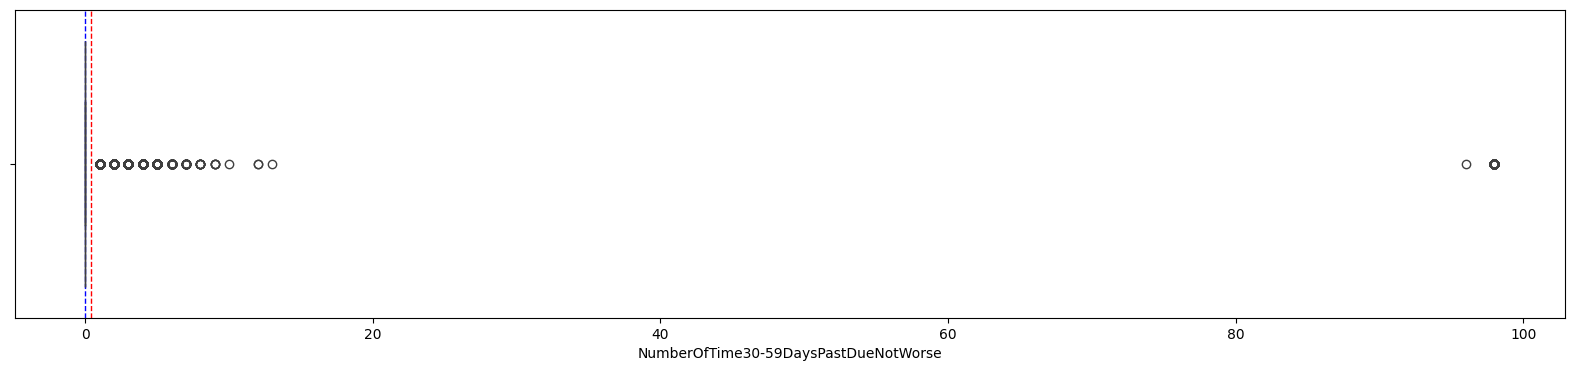

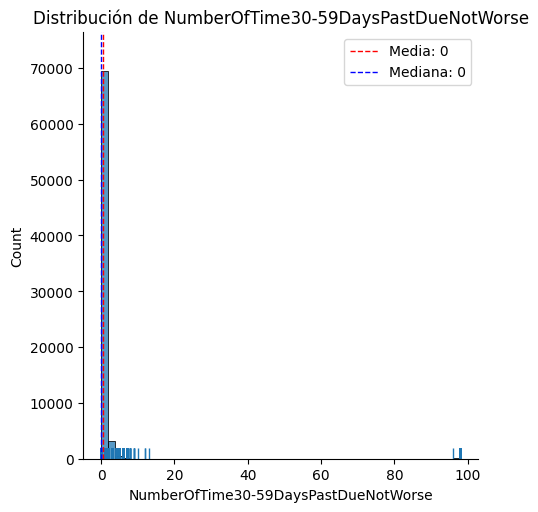

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: DebtRatio



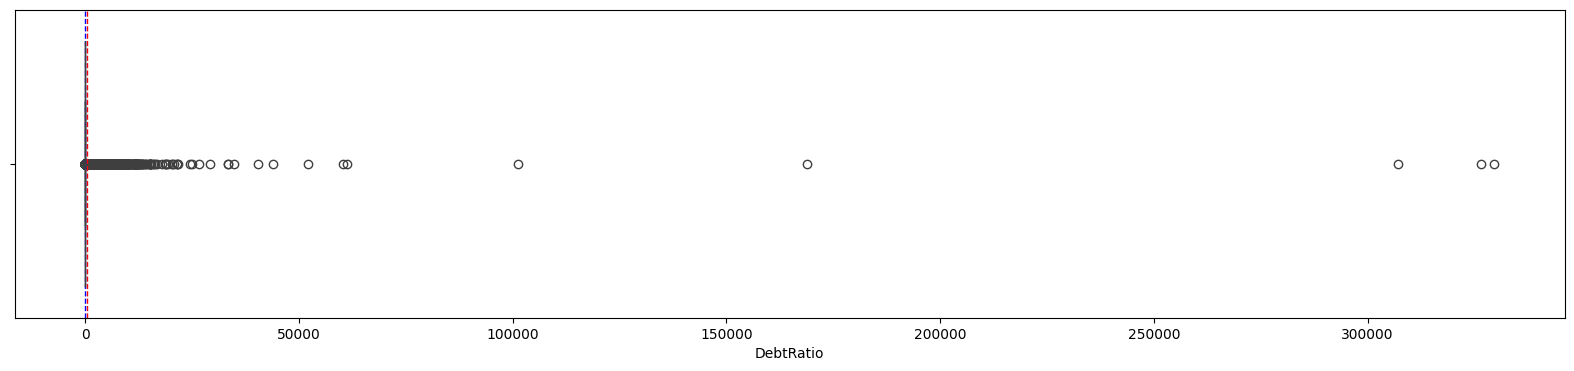

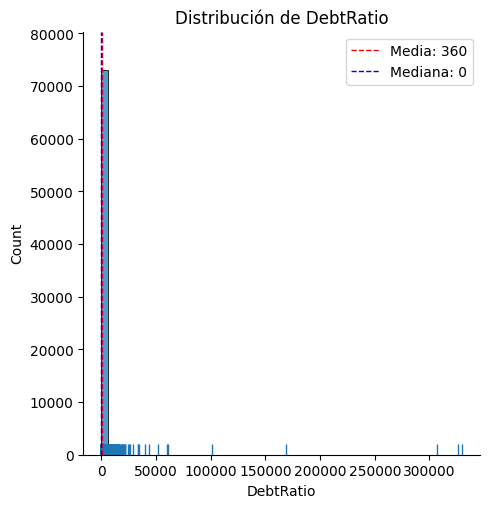

count     73363.0
mean        360.0
std        2478.0
min           0.0
25%           0.0
50%           0.0
75%           1.0
max      329664.0
Name: DebtRatio, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: MonthlyIncome



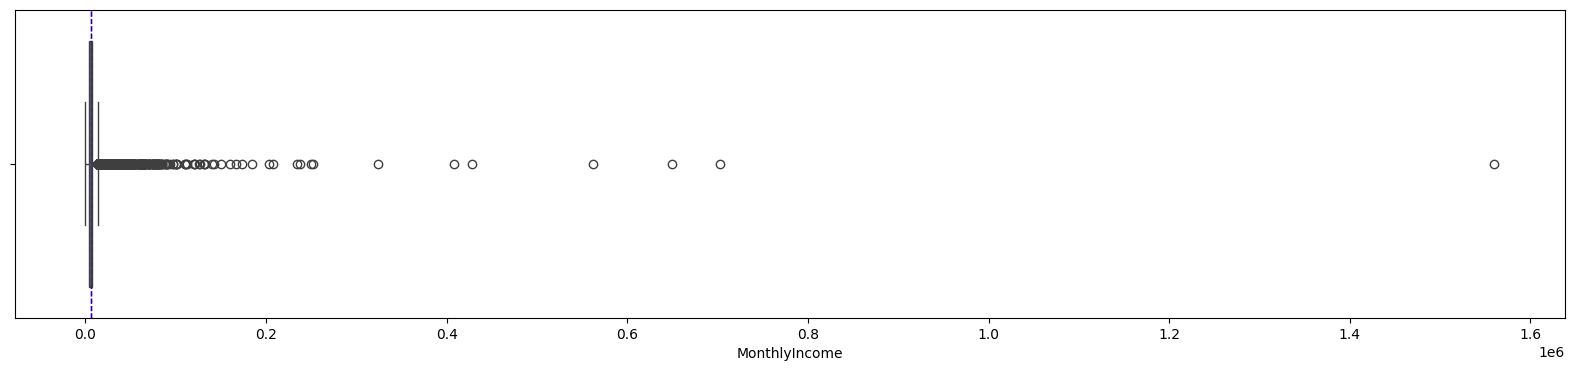

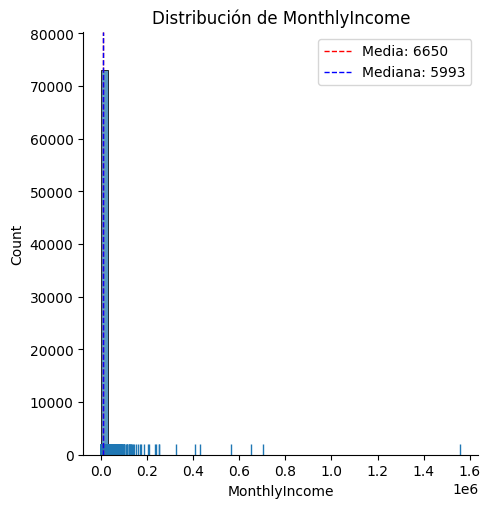

count      73363.0
mean        6650.0
std         9391.0
min            0.0
25%         3800.0
50%         5993.0
75%         7740.0
max      1560100.0
Name: MonthlyIncome, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfOpenCreditLinesAndLoans



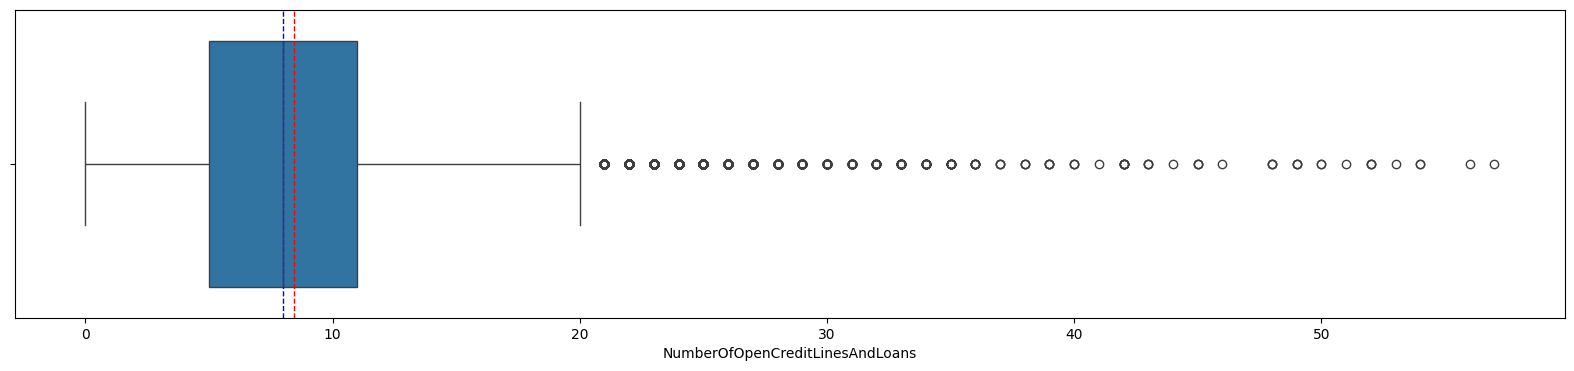

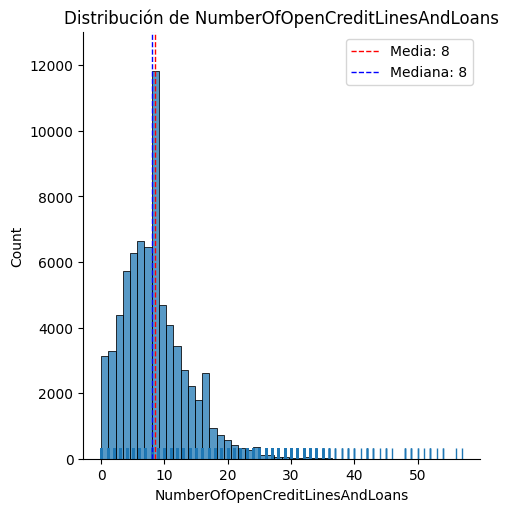

count    73363.0
mean         8.0
std          5.0
min          0.0
25%          5.0
50%          8.0
75%         11.0
max         57.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTimes90DaysLate



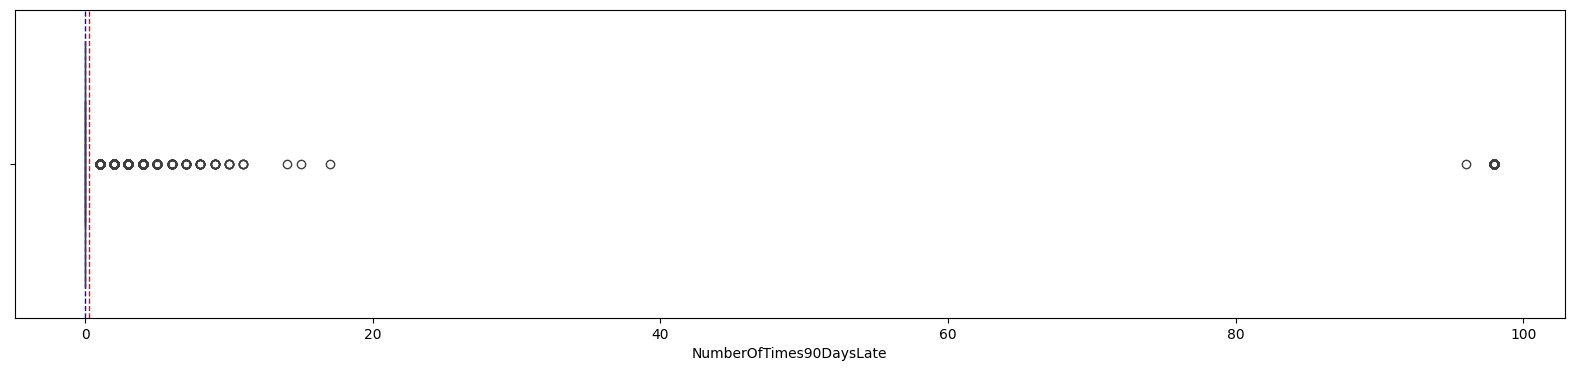

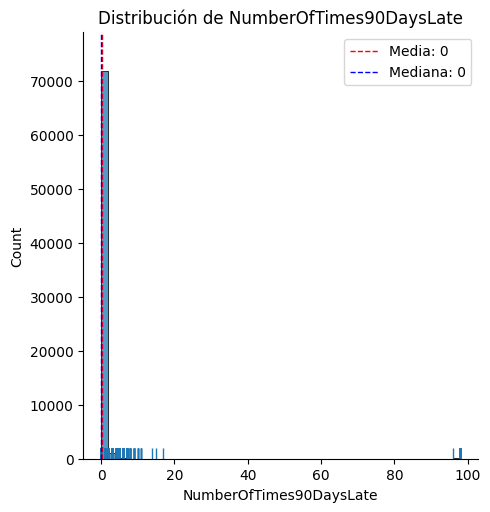

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTimes90DaysLate, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberRealEstateLoansOrLines



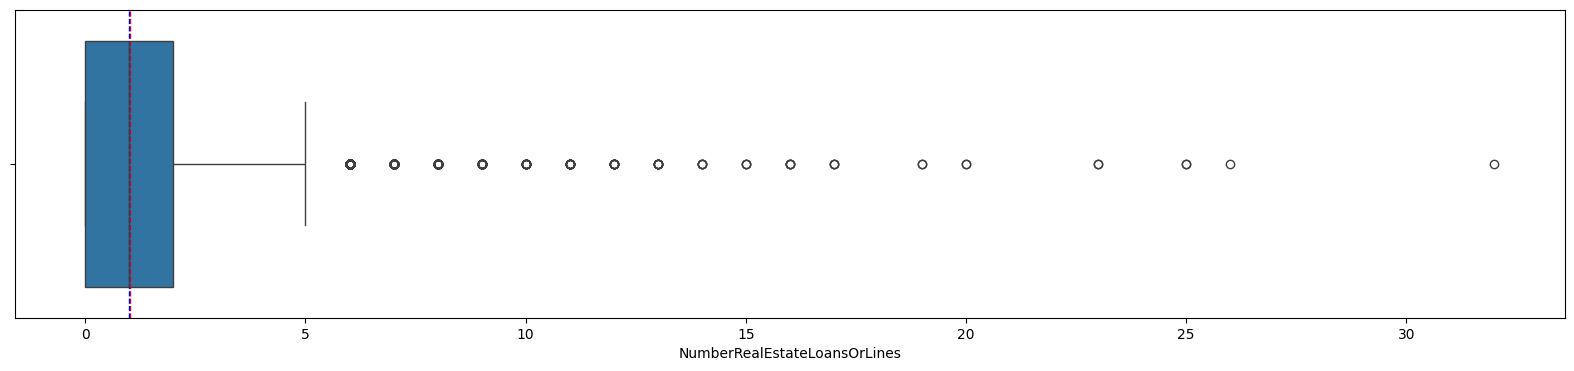

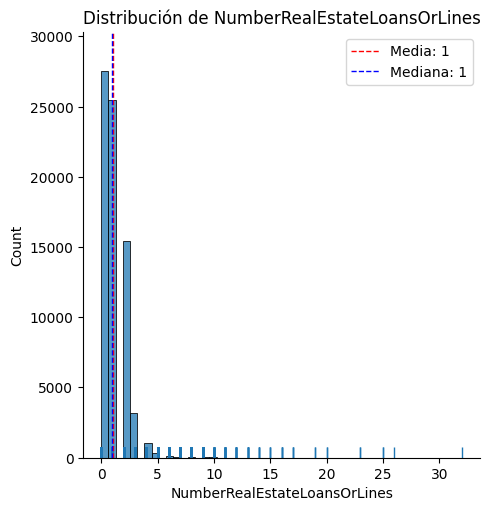

count    73363.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          1.0
75%          2.0
max         32.0
Name: NumberRealEstateLoansOrLines, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime60-89DaysPastDueNotWorse



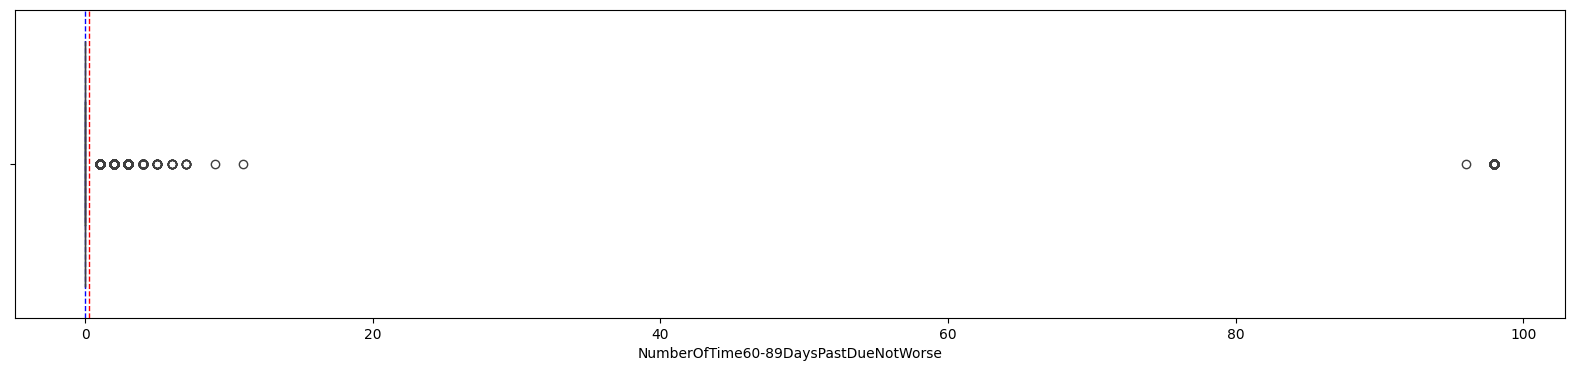

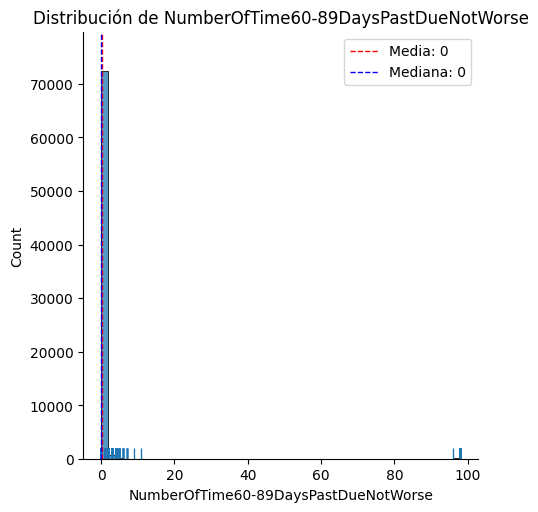

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfDependents



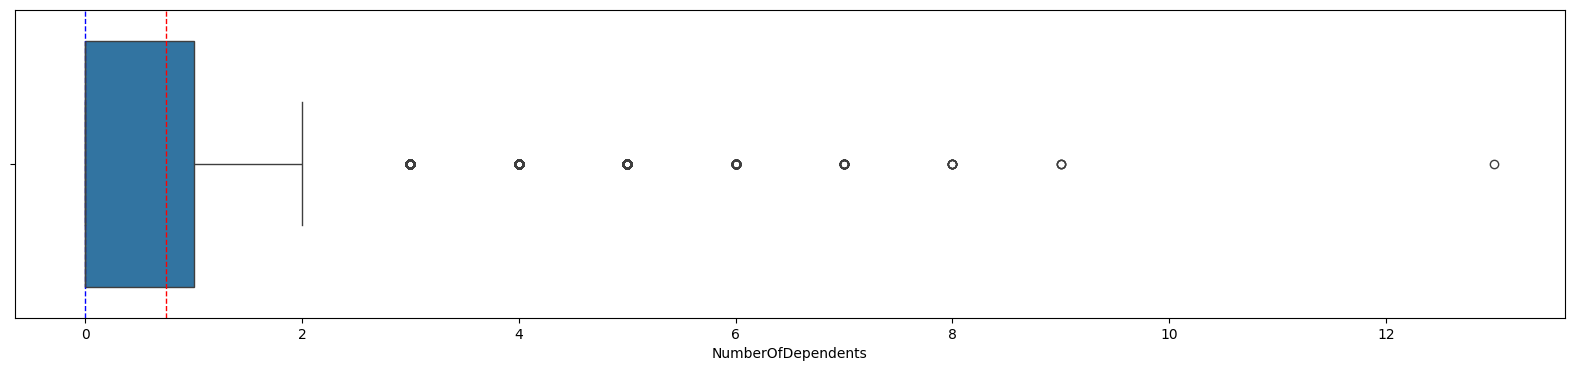

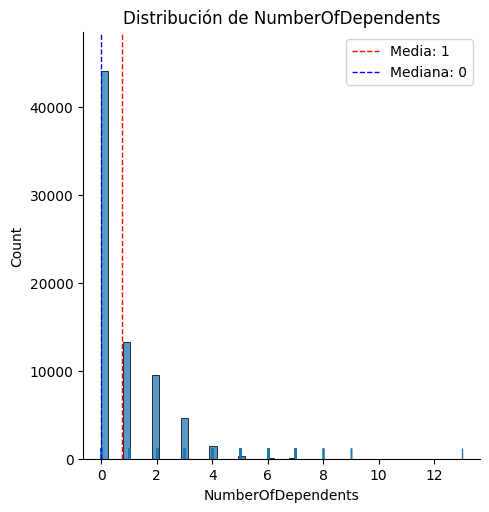

count    73363.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max         13.0
Name: NumberOfDependents, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: age_n



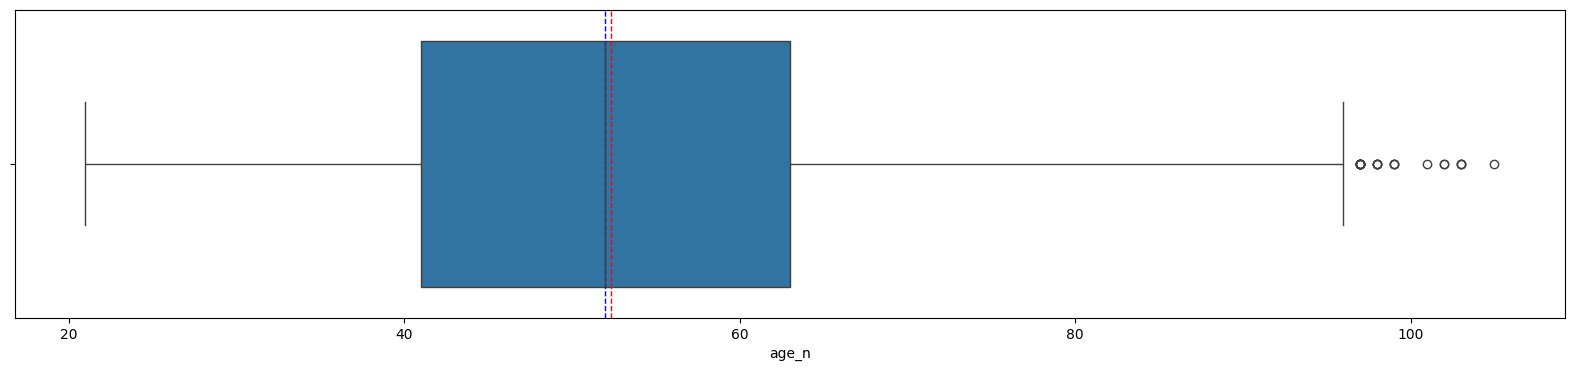

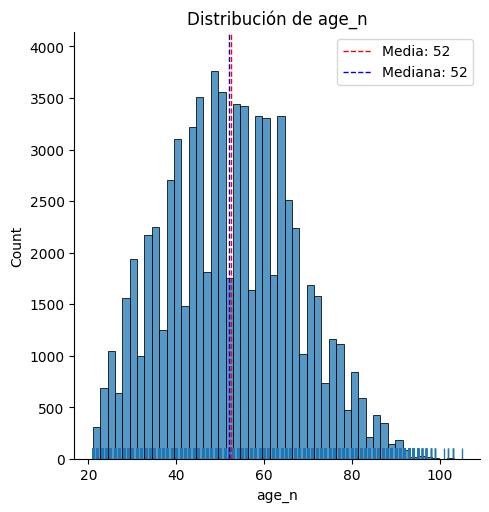

count    73363.0
mean        52.0
std         15.0
min         21.0
25%         41.0
50%         52.0
75%         63.0
max        105.0
Name: age_n, dtype: float64
------------------------------------------------------------


In [101]:
graficos_variables_cuant(train)

#### Ecalar los datos así podemos trabajar mejor

In [102]:
from sklearn.preprocessing import RobustScaler
datos_a_escalar = train.drop(columns=['Id', 'age_n', 'target'], axis = 1)

scaler = RobustScaler()
df_escalado_array = scaler.fit_transform(datos_a_escalar)
df_escalado = pd.DataFrame(df_escalado_array, columns=datos_a_escalar.columns)

df_escalado

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.159939,1.0,0.466900,-0.968256,0.666667,0.0,0.0,0.0,0.0
1,0.255581,0.0,0.028635,-0.569322,1.333333,0.0,0.0,0.0,1.0
2,-0.292451,0.0,-0.027873,0.213066,0.000000,0.0,0.0,0.0,0.0
3,-0.205364,1.0,0.060685,-0.201348,-0.333333,0.0,0.0,0.0,1.0
4,0.026626,0.0,6813.288609,0.261772,0.333333,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
73358,-0.272661,0.0,-0.223274,1.651209,1.166667,0.0,0.0,0.0,3.0
73359,-0.044312,0.0,-0.078542,-0.252103,0.166667,0.0,-0.5,0.0,0.0
73360,0.748372,0.0,4023.709531,0.424369,0.666667,0.0,0.0,0.0,0.0
73361,0.990602,0.0,0.103255,-0.556633,0.666667,0.0,0.0,0.0,0.0


In [103]:
df_escalado.columns

Index(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [104]:
train

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_n
0,44164,0,0.768219,1,0.687930,2178.000000,12,0,1,0,0.0,68
1,95356,0,0.289873,0,0.385497,3750.000000,16,0,1,0,1.0,52
2,108917,0,0.000000,0,0.346503,6833.000000,8,0,1,0,0.0,54
3,99039,0,0.046064,1,0.407614,5200.000000,6,0,1,0,1.0,66
4,116168,0,0.168771,0,4702.000000,7024.924620,10,0,3,0,1.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,0,0.211663,12500.000000,15,0,1,0,3.0,45
73359,105554,0,0.131250,0,0.311538,5000.000000,9,0,0,0,0.0,42
73360,129050,0,0.550527,0,2777.000000,7665.639647,12,0,1,0,0.0,59
73361,94633,0,0.678651,0,0.436990,3800.000000,12,0,1,0,0.0,31


In [105]:
train_escalado = pd.concat([train[['target', 'age_n']], df_escalado], axis=1)

In [106]:
train_escalado

,target,age_n,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,68,1.159939,1.0,0.466900,-0.968256,0.666667,0.0,0.0,0.0,0.0
1,0,52,0.255581,0.0,0.028635,-0.569322,1.333333,0.0,0.0,0.0,1.0
2,0,54,-0.292451,0.0,-0.027873,0.213066,0.000000,0.0,0.0,0.0,0.0
3,0,66,-0.205364,1.0,0.060685,-0.201348,-0.333333,0.0,0.0,0.0,1.0
4,0,45,0.026626,0.0,6813.288609,0.261772,0.333333,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
73358,0,45,-0.272661,0.0,-0.223274,1.651209,1.166667,0.0,0.0,0.0,3.0
73359,0,42,-0.044312,0.0,-0.078542,-0.252103,0.166667,0.0,-0.5,0.0,0.0
73360,0,59,0.748372,0.0,4023.709531,0.424369,0.666667,0.0,0.0,0.0,0.0
73361,0,31,0.990602,0.0,0.103255,-0.556633,0.666667,0.0,0.0,0.0,0.0


In [107]:
def grafico_heatmap(data):
    '''Función para graficar en un mapa de calor mostrando las correlaciones entre las variables'''
    try:
        plt.figure(figsize=(10,10))
        sns.heatmap(data.corr(), robust=True, linewidths = .3, annot=True)      
    except Exception as a:
        print(f"No pude hacer el gráfico por {a}")

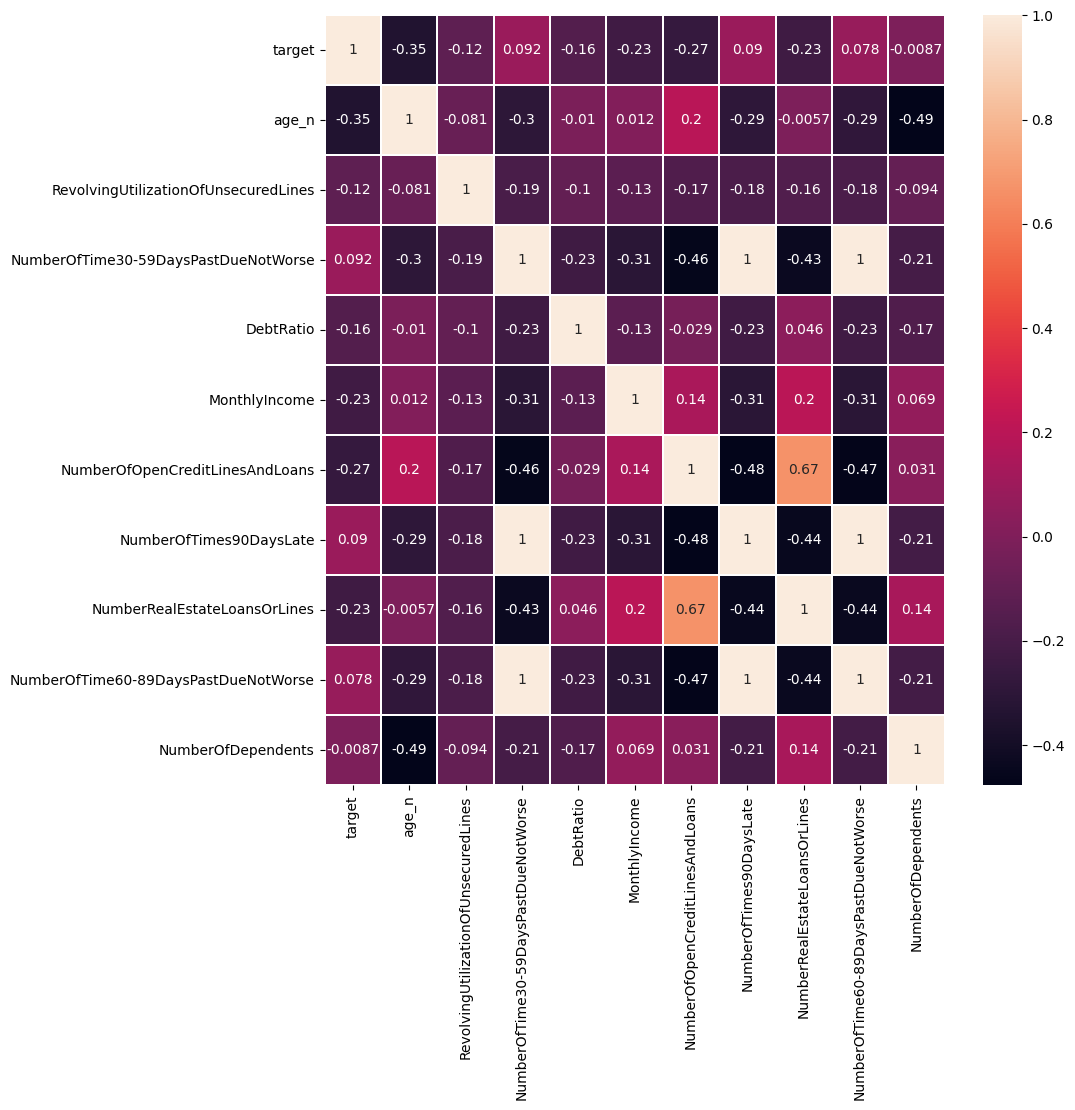

In [108]:
grafico_heatmap(train_escalado.corr())

In [109]:
train_escalado[['target', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']].corr()

,target,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
target,1.000000,0.118269,-0.025573,-0.025422,0.110286,0.094685,0.043763
NumberOfTime30-59DaysPastDueNotWorse,0.118269,1.000000,-0.015352,-0.052267,0.982972,0.986497,-0.007395
MonthlyIncome,-0.025573,-0.015352,1.000000,0.118796,-0.018141,-0.016447,0.085886
NumberOfOpenCreditLinesAndLoans,-0.025422,-0.052267,0.118796,1.000000,-0.077750,-0.069061,0.072739
NumberOfTimes90DaysLate,0.110286,0.982972,-0.018141,-0.077750,1.000000,0.992336,-0.014360
NumberOfTime60-89DaysPastDueNotWorse,0.094685,0.986497,-0.016447,-0.069061,0.992336,1.000000,-0.015068
NumberOfDependents,0.043763,-0.007395,0.085886,0.072739,-0.014360,-0.015068,1.000000


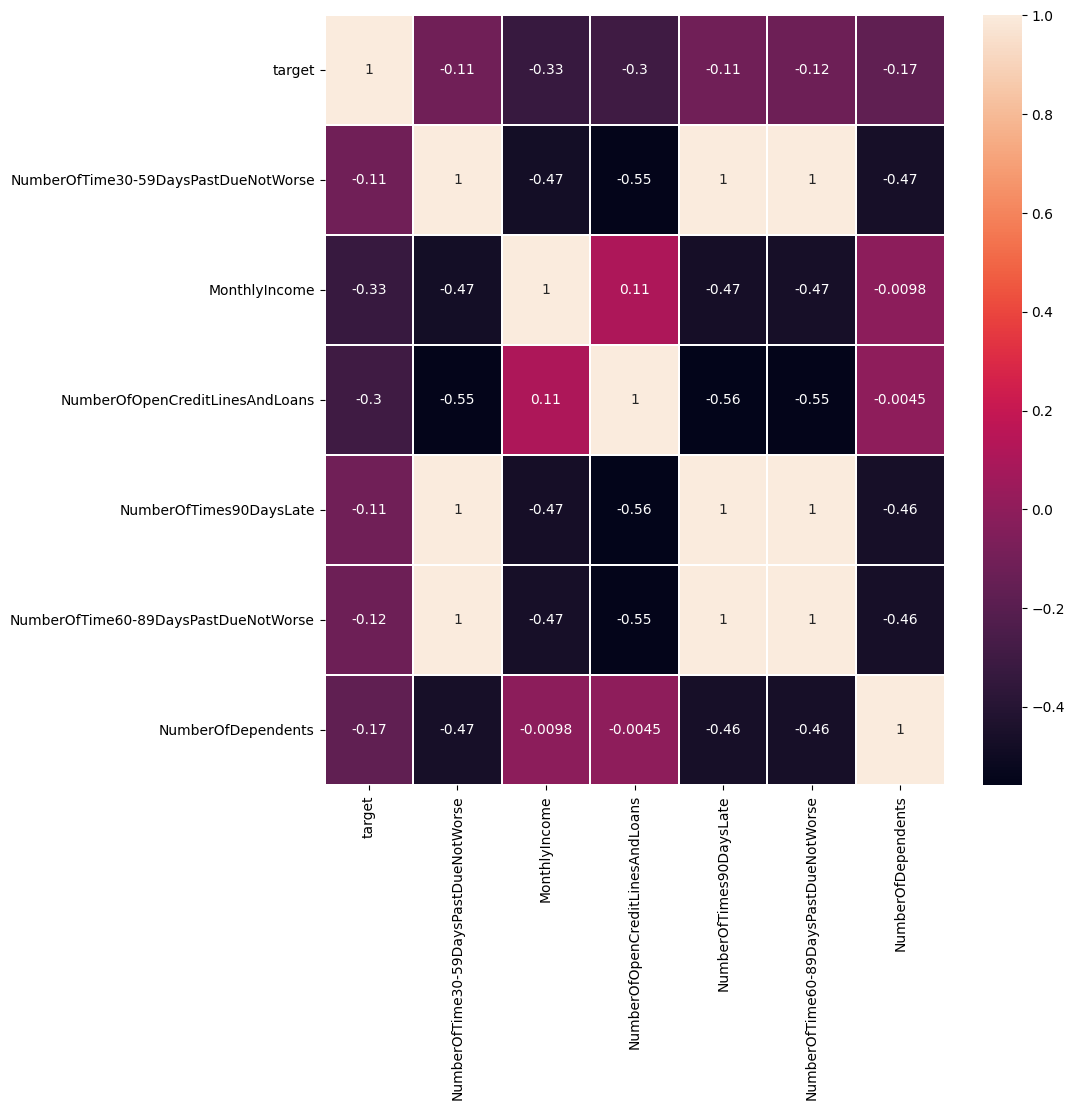

In [110]:
grafico_heatmap(train_escalado[['target', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']].corr())

In [111]:
train_escalado_nuevo = train_escalado[['target', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']]

array([[<Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <Axes: >]], dtype=object)

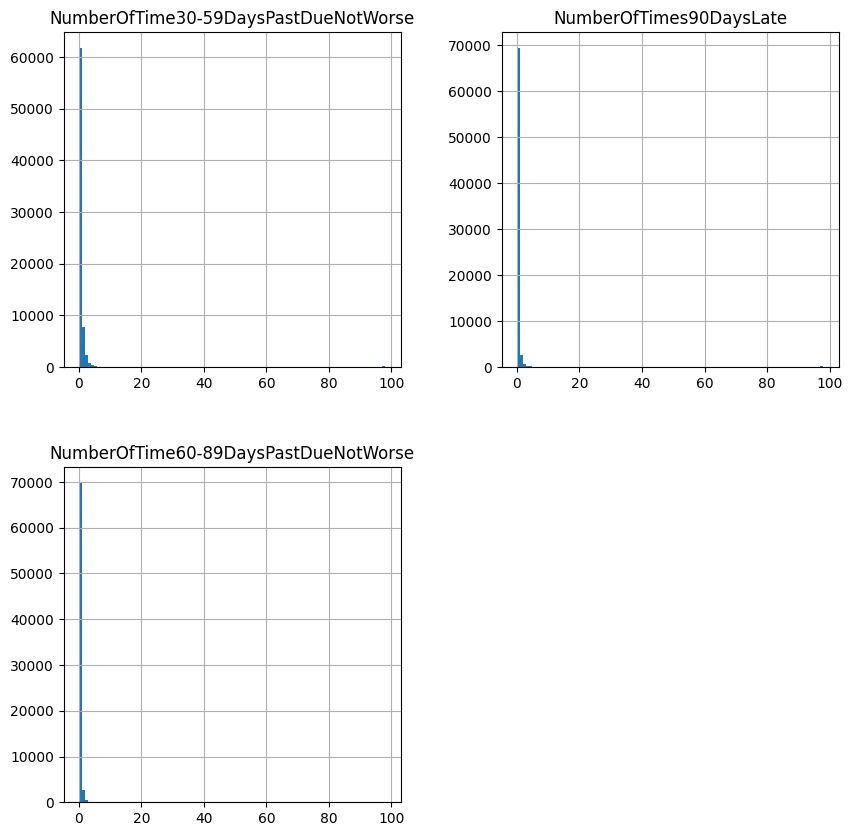

In [112]:
train_escalado_nuevo[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']].hist(bins=100, figsize=(10,10))

------------------------------------------------------------
VARIABLE: NumberOfTime30-59DaysPastDueNotWorse



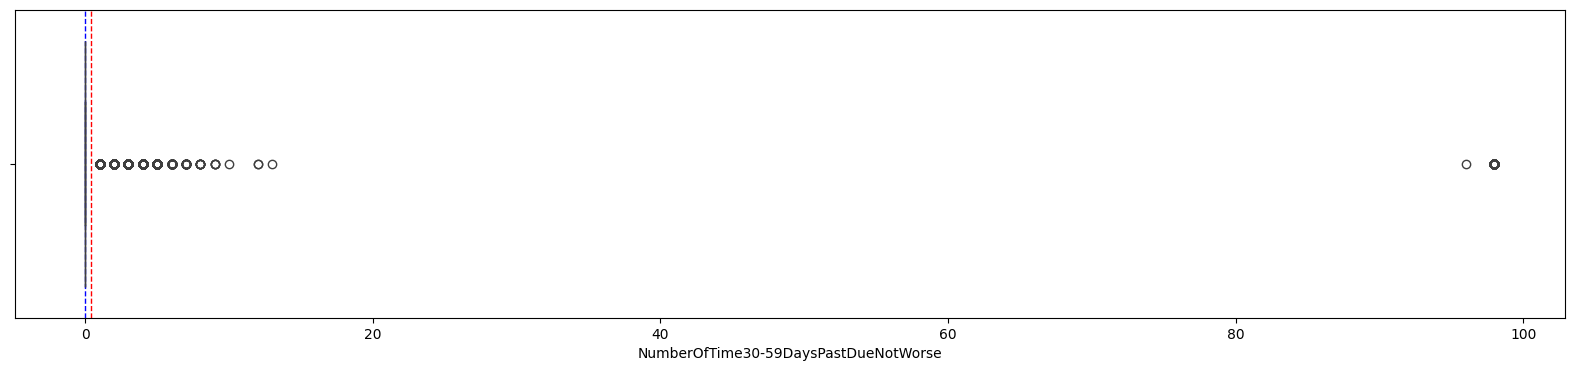

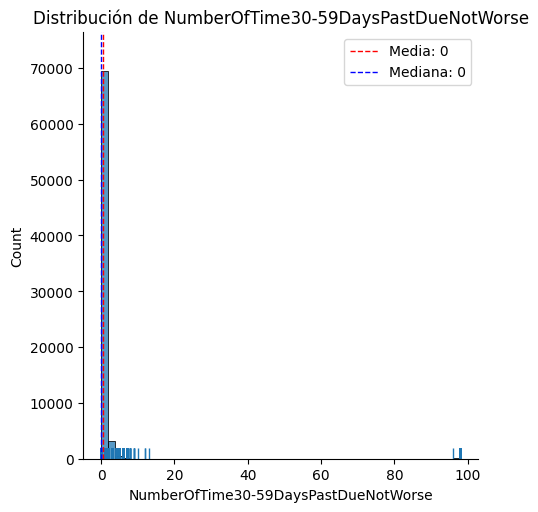

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTimes90DaysLate



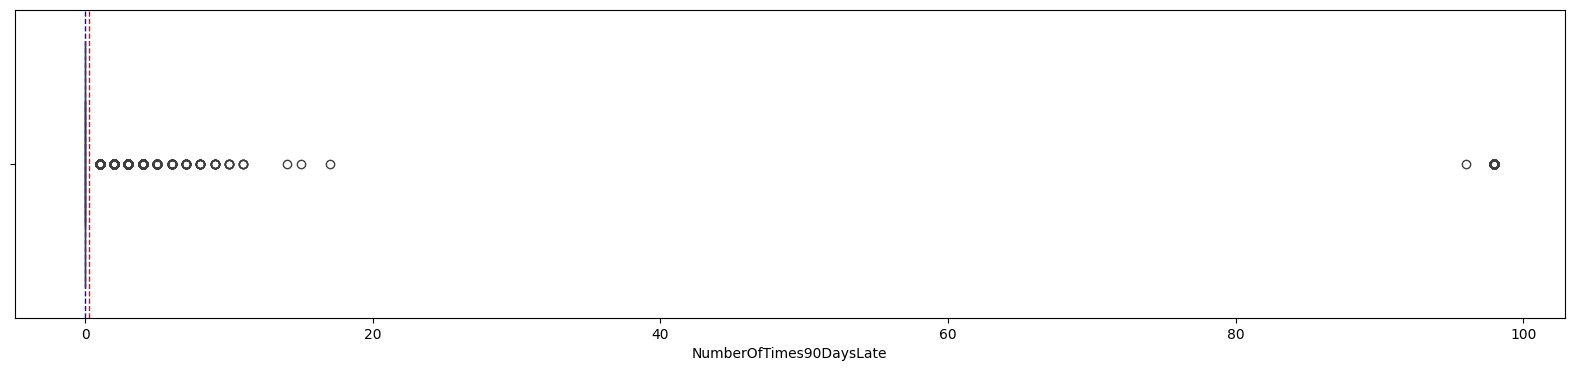

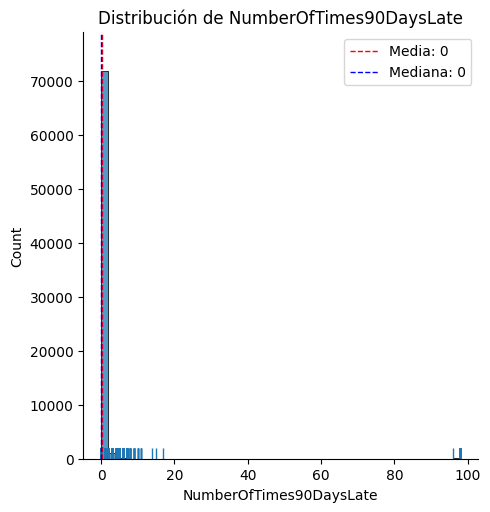

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTimes90DaysLate, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime60-89DaysPastDueNotWorse



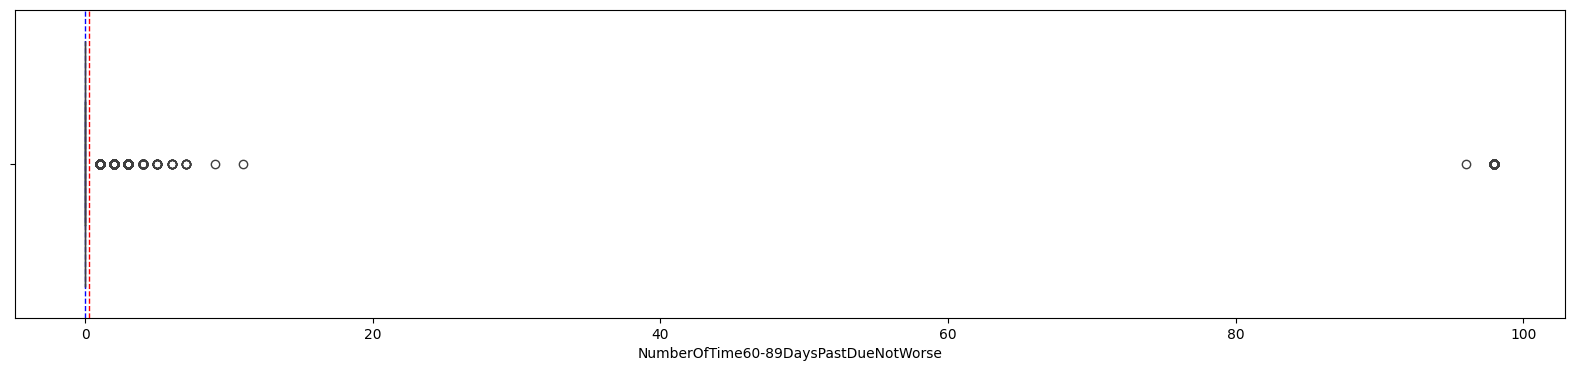

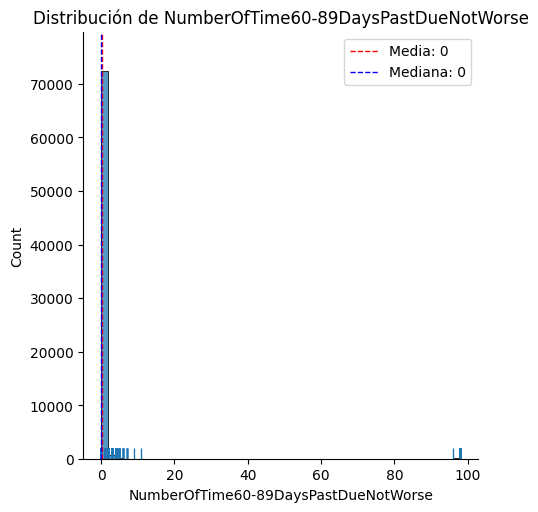

count    73363.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------


In [113]:
graficos_variables_cuant(train_escalado_nuevo[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']])

In [114]:
# train_escalado_nuevo = train_escalado_nuevo[(train_escalado_nuevo['NumberOfTime30-59DaysPastDueNotWorse'] < 20) | 
                    #  (train_escalado_nuevo['NumberOfTimes90DaysLate'] < 20) | 
                    #  (train_escalado_nuevo['NumberOfTime60-89DaysPastDueNotWorse'] < 20)]

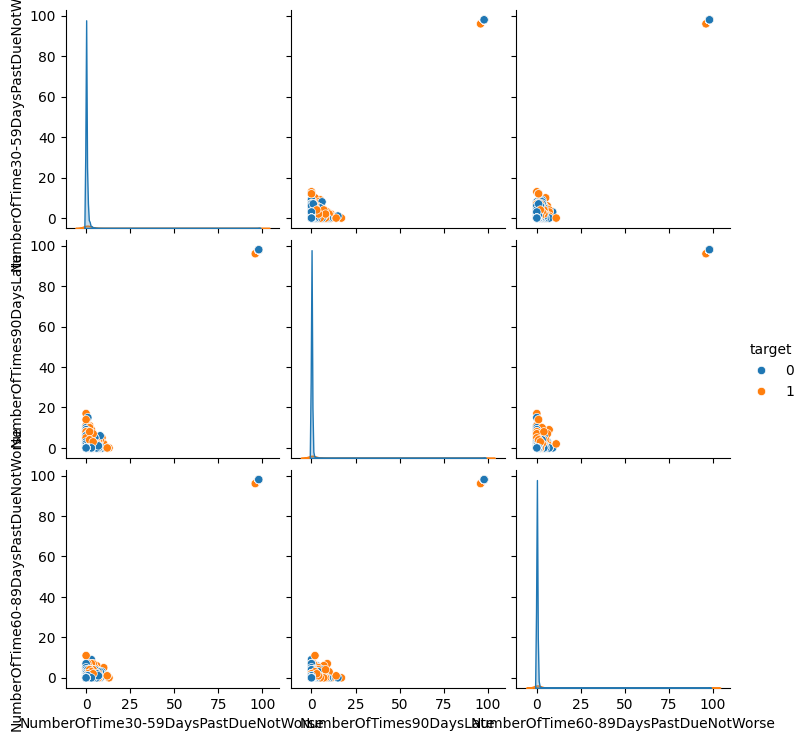

In [115]:
sns.pairplot(train_escalado_nuevo, hue='target')

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [120]:
X_train = train_escalado_nuevo.drop(columns='target')
y_train = train_escalado_nuevo['target']

### 2. Dividir X_train, X_test, y_train, y_test

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

model_0 = SVC()
model_1 = LogisticRegression(C= 0.01, max_iter =  100, penalty =  'l2', solver = 'liblinear')
model_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10,
                                 n_jobs=-1, random_state=42)

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
models = [model_0, model_1, model_2]
# metricas = ['accuracy', "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]
dicc = {}

for i in models:
    scores = cross_val_score(i, X_train, y_train, cv=10, scoring='accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{i}"

    dicc[clave] = media

In [127]:
pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)

,0
"RandomForestClassifier(max_leaf_nodes=10, n_estimators=500, n_jobs=-1,\n random_state=42)",0.936726
SVC(),0.936657
"LogisticRegression(C=0.01, solver='liblinear')",0.934545


In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]  
}

model_3 = LogisticRegression()

grid_search = GridSearchCV(model_1,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.01, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [129]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [131]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

model_4 = RandomForestClassifier()

grid_search = GridSearchCV(model_4,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
460 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [133]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
modelo = RandomForestClassifier(bootstrap=True)

In [122]:
scores = cross_val_score(model_1, X_train, y_train, cv=10, scoring='accuracy')
media = scores.mean()
estandar = scores.std()

In [123]:
media

0.9347491126301625

In [124]:
estandar

0.0011198198872116323

### 3. Asignar el modelo (vacío) a una variable


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de AUC.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [52]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53y,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57y,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68y,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74y,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66y,0,9.000000,NaN,5,0,0,0,0.0


In [54]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         25228 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    30635 non-null  float64
dtypes: float64(4), 

In [57]:
X_pred = columna_age(X_pred)
X_pred.drop(columns='age', axis=1, inplace=True)

In [60]:
dicc = X_pred.groupby(by='age_n').mean()[['MonthlyIncome']].dropna().to_dict()['MonthlyIncome']

In [61]:
X_pred['MonthlyIncome'].fillna(X_pred['age_n'].map(dicc), inplace=True)

In [63]:
dicc_1 = X_pred.groupby(by='age_n').median()[['NumberOfDependents']].dropna().to_dict()['NumberOfDependents']

In [64]:
X_pred['NumberOfDependents'].fillna(X_pred['age_n'].map(dicc_1), inplace=True)

In [65]:
X_pred['MonthlyIncome'].fillna(X_pred['MonthlyIncome'].median(), inplace=True)

In [66]:
X_pred['NumberOfDependents'].fillna(X_pred['NumberOfDependents'].median(), inplace=True)

In [67]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 3   DebtRatio                             31442 non-null  float64
 4   MonthlyIncome                         31442 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 6   NumberOfTimes90DaysLate               31442 non-null  int64  
 7   NumberRealEstateLoansOrLines          31442 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 9   NumberOfDependents                    31442 non-null  float64
 10  age_n                                 31442 non-null  int64  
dtypes: float64(4), 

In [69]:
from sklearn.preprocessing import RobustScaler
datos_a_escalar = X_pred.drop(columns=['Id', 'age_n'], axis = 1)

df_escalado_array = scaler.transform(datos_a_escalar)
df_escalado_1 = pd.DataFrame(df_escalado_array, columns=datos_a_escalar.columns)

df_escalado_1

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.194553,0.0,-0.516452,-0.951253,-0.833333,0.0,-0.5,0.0,0.0
1,-0.250607,0.0,-0.066914,0.425984,3.000000,0.0,0.0,0.0,2.0
2,-0.266564,0.0,-0.328228,-0.489636,-0.666667,0.0,-0.5,0.0,1.0
3,-0.257347,0.0,-0.502816,1.143659,3.166667,0.0,-0.5,0.0,0.0
4,-0.276136,0.0,12.512186,0.242885,-0.500000,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
31437,0.595090,0.0,-0.487872,-0.971301,-1.166667,0.0,-0.5,0.0,0.0
31438,0.032560,0.0,0.014230,-0.040708,0.000000,0.0,0.5,0.0,4.0
31439,-0.283298,1.0,42.943958,-1.520977,-0.833333,0.0,-0.5,0.0,2.0
31440,0.911013,0.0,0.171278,0.255447,0.333333,2.0,0.0,0.0,1.0


In [70]:
X_pred_escalado = pd.concat([X_pred[[ 'age_n']], df_escalado_1], axis=1)

In [71]:
X_pred_escalado

,age_n,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,53,-0.194553,0.0,-0.516452,-0.951253,-0.833333,0.0,-0.5,0.0,0.0
1,57,-0.250607,0.0,-0.066914,0.425984,3.000000,0.0,0.0,0.0,2.0
2,68,-0.266564,0.0,-0.328228,-0.489636,-0.666667,0.0,-0.5,0.0,1.0
3,74,-0.257347,0.0,-0.502816,1.143659,3.166667,0.0,-0.5,0.0,0.0
4,66,-0.276136,0.0,12.512186,0.242885,-0.500000,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
31437,28,0.595090,0.0,-0.487872,-0.971301,-1.166667,0.0,-0.5,0.0,0.0
31438,44,0.032560,0.0,0.014230,-0.040708,0.000000,0.0,0.5,0.0,4.0
31439,51,-0.283298,1.0,42.943958,-1.520977,-0.833333,0.0,-0.5,0.0,2.0
31440,42,0.911013,0.0,0.171278,0.255447,0.333333,2.0,0.0,0.0,1.0


In [117]:
X_pred_escalado[(X_pred_escalado['NumberOfTime30-59DaysPastDueNotWorse'] > 20) | 
                     (X_pred_escalado['NumberOfTimes90DaysLate'] > 20) | 
                     (X_pred_escalado['NumberOfTime60-89DaysPastDueNotWorse'] > 20)]

,age_n,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
333,28,1.598143,98.0,-0.530002,-0.616850,-1.333333,98.0,-0.5,98.0,0.0
1556,42,1.598143,98.0,-0.530002,0.139684,-1.333333,98.0,-0.5,98.0,0.0
1804,25,1.598143,98.0,-0.530002,-0.962673,-1.333333,98.0,-0.5,98.0,0.0
2116,29,1.598143,98.0,-0.530002,-1.103010,-1.333333,98.0,-0.5,98.0,0.0
2298,21,1.598143,98.0,-0.530002,-1.165693,-1.333333,98.0,-0.5,98.0,0.0
3184,26,1.598143,98.0,-0.530002,-0.797347,-1.333333,98.0,-0.5,98.0,0.0
3879,46,1.598143,96.0,-0.454987,-0.349553,-1.333333,96.0,-0.5,96.0,0.0
3995,59,1.598143,98.0,-0.530002,0.445231,-1.333333,98.0,-0.5,98.0,0.0
4788,25,1.598143,98.0,50.189618,-0.879917,-1.333333,98.0,-0.5,98.0,0.0
5389,59,1.598143,98.0,360.303863,0.445231,-1.333333,98.0,-0.5,98.0,0.0


------------------------------------------------------------
VARIABLE: NumberOfTime30-59DaysPastDueNotWorse



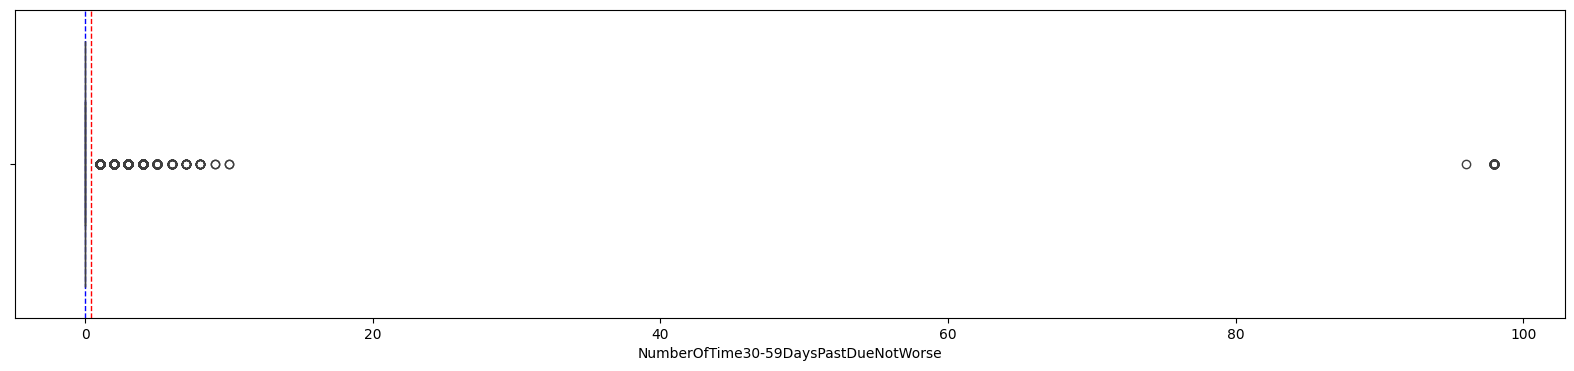

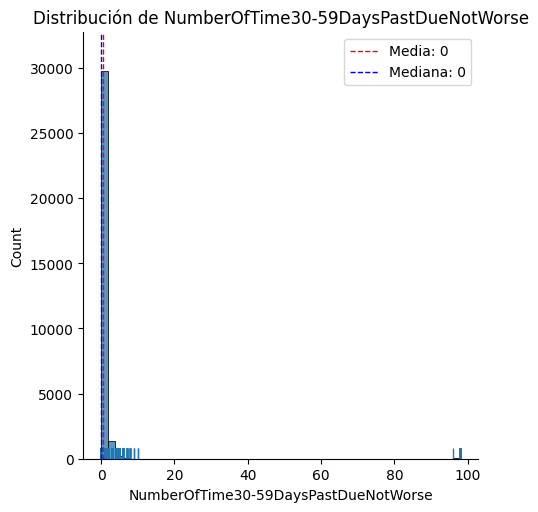

count    31442.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTimes90DaysLate



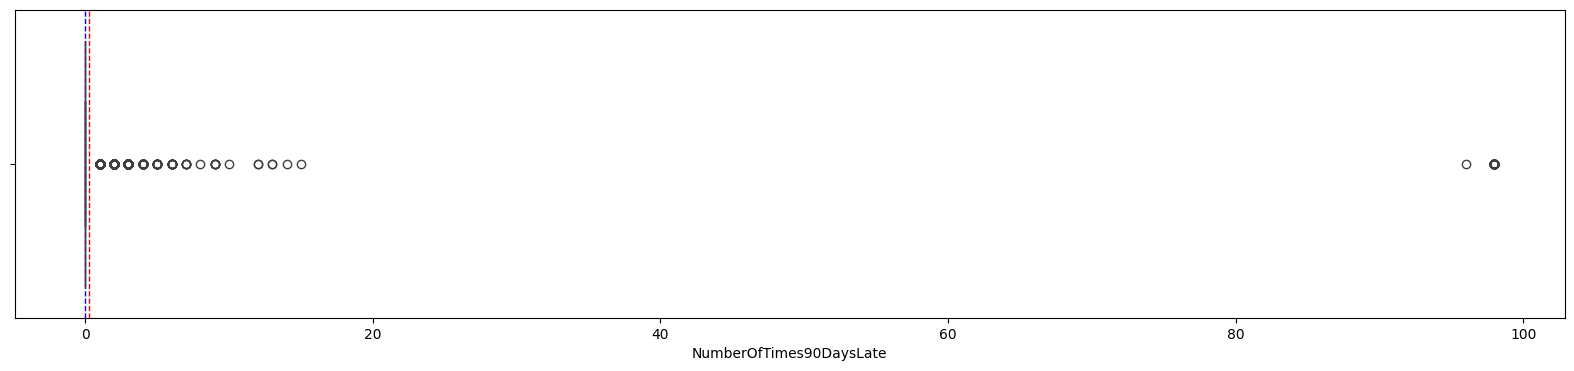

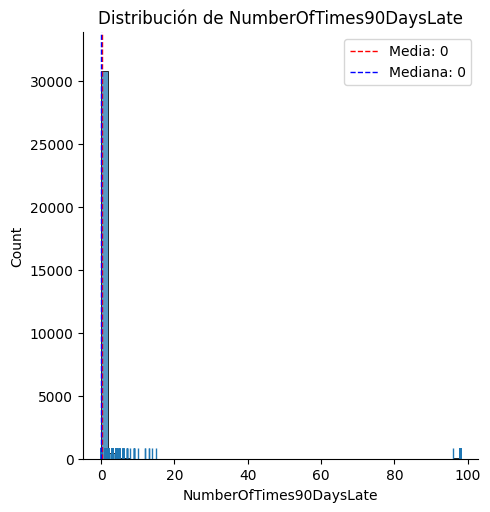

count    31442.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTimes90DaysLate, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: NumberOfTime60-89DaysPastDueNotWorse



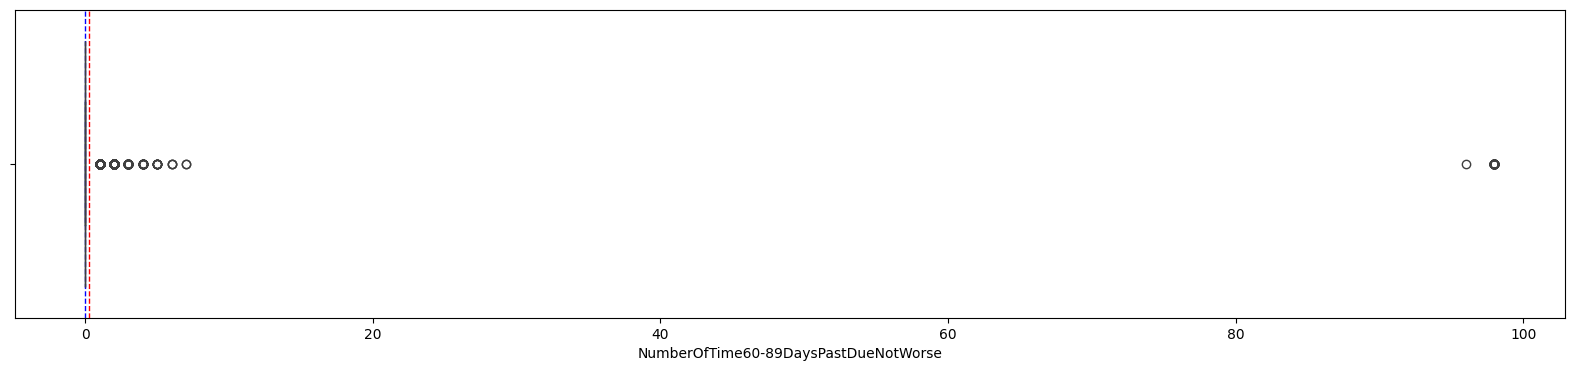

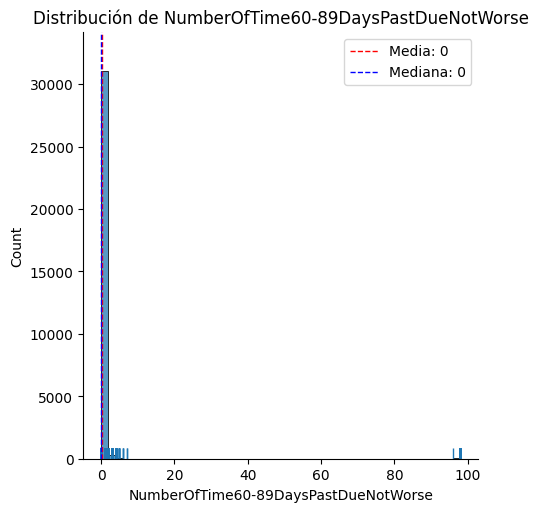

count    31442.0
mean         0.0
std          4.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         98.0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64
------------------------------------------------------------


In [73]:
graficos_variables_cuant(X_pred_escalado[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']])

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions_submit = model_1.predict(X_pred)
predictions_submit

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [5]:
sample = pd.read_csv("data/sample_submission.csv")

In [6]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
submission = pd.DataFrame({"Id": sample['laptop_ID'], "target": predictions_submit})

In [ ]:
submission.head()

In [ ]:
submission.shape

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
chequeator(submission)